# Import Libraries

In [1]:
import random
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import copy
import logging
import missingno
from collections import Counter
from category_encoders import TargetEncoder, BinaryEncoder
from imblearn.over_sampling import (
    SMOTE,
    RandomOverSampler,
    SVMSMOTE,
    BorderlineSMOTE,
    ADASYN,
    SMOTEN,
    SMOTENC
)
from imblearn.under_sampling import (
    TomekLinks, 
    RandomUnderSampler,
    EditedNearestNeighbours, 
    RepeatedEditedNearestNeighbours, 
    AllKNN, 
    CondensedNearestNeighbour, 
    ClusterCentroids, 
    NearMiss
)
from sklearn.model_selection import (
    LeaveOneOut,
    LeavePOut,
    RepeatedKFold,
    StratifiedKFold,
    TimeSeriesSplit,
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    learning_curve,
    KFold
)
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import (
    LabelEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    LabelBinarizer, 
    MultiLabelBinarizer,
    MaxAbsScaler,
    QuantileTransformer,
    PowerTransformer,
    Normalizer
)
from sklearn.feature_extraction import (
    DictVectorizer, 
    FeatureHasher
)
from sklearn.linear_model import (
    LogisticRegression,
    Ridge,
    Lasso,
    ElasticNet,
    BayesianRidge
)
from sklearn.feature_selection import (
    SelectKBest, 
    SelectFpr, 
    SelectFdr, 
    SelectFwe, 
    SelectPercentile, 
    GenericUnivariateSelect, 
    VarianceThreshold, 
    RFE, 
    RFECV, 
    SequentialFeatureSelector, 
    SelectFromModel, 
    f_regression, 
    chi2, 
    f_classif, 
    mutual_info_classif, 
    mutual_info_regression
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import (
    KNeighborsClassifier,
    NearestNeighbors
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    matthews_corrcoef,
    balanced_accuracy_score
)
from tpot import TPOTClassifier
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.decomposition import (
    PCA, 
    FactorAnalysis, 
    TruncatedSVD, 
    FastICA, 
    KernelPCA
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from tensorflow.keras.layers import Input, Dense  # type: ignore
from tensorflow.keras.models import Model  # type: ignore
from scipy.stats import uniform, randint
from fast_ml.model_development import train_valid_test_split
from typing import (
    Any,
    Literal,
    Union,
    List,
    Optional,
    Dict,
    Tuple
)
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
logging.basicConfig(level=logging.INFO)

# Call_def

In [2]:
from ML_def import (
    read_data,
    columns_info,
    not_useful_columns,
    convert_to_numeric,
    target_last_col,
    remove_missing_rows,
    fill_missing_values_dataFrame,
    fill_missing_values_column,
    check_outliers,
    box_plot_all_columns,
    check_balance_classification,
    over_under_sampling_classification,
    plot_groupby,
    plot_pivot,
    plot_pivot_2,
    plot_groupby_and_pivot,
    calculate_correlation,
    Heatmap_Correlation,
    create_custom_scatter_plot,
    plot_histograms,
    encode_column,
    get_x_y_TVT,
    get_x_y_TVT_shape,
    feature_selection,
    dimensionality_reduction,
    scale_data,
    get_cross_validator,
    grid_search_classifier,
    random_search_classifier,
    get_classifier,
    get_x_y,
    plot_feature_importance,
    Check_Overfitting_Classification,
    plot_confusion_matrix,
    evaluate_model_Classification,
)

# call_visualization_def

In [3]:
from ML_visualization import (
    plot_line,
    plot_line_matplotlib,
    plot_line_all_column,
    plot_line_seaborn,
    plot_line_plotly,
    scatter_plot_matplotlib,
    scatter_plot_seaborn,
    scatter_plot_plotly,
    reg_plot,
    resid_plot,
    bar_plot_matplotlib,
    bar_plot_seaborn,
    bar_plot_all_column,
    bar_plot_plotly,
    multiple_bar_plot_matplotlib,
    multiple_bar_plots_seaborn,
    multiple_bar_plots_plotly,
    cat_plot,
    cat_plot_all_column,
    facet_grid_seaborn,
    pie_chart,
    pie_chart_plotly,
    plot_single_histogram_matplotlib,
    plot_histograms_matplotlib,
    plot_single_histogram_seaborn,
    plot_histograms_seaborn,
    plot_histograms_plotly,
    kde_plot,
    kde_plot_all_column,
    count_plot,
    count_plot_all_column,
    count_plot_plotly,
    box_plot_matplotlib,
    box_plot_seaborn,
    box_plot_plotly,
    box_plot_all_column,
    heatmap_plot,
    heatmap_plot_plotly,
    pair_plot,
    pair_plot_plotly,
    violin_plot,
    violin_plot_plotly,
    plot_violin_all_column,
    joint_plot,
    plot_parallel_coordinates,
    plot_contour,
    plot_tricontourf,
    custom_plot
)

# Read_Data

In [4]:
df = read_data(r'Telco-Customer-Churn.csv')
df.head()

the DataFrame dont have any duplicates row
Data read successfully from Telco-Customer-Churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Make the target is last column
df = target_last_col(df,'Churn')

# Get Information of Data

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
columns_info(df)

,names,dtypes,unique,n_unique,number_of_rows,number_of_null
0,customerID,object,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...",7043,7043,0
1,gender,object,"[Female, Male]",2,7043,0
2,SeniorCitizen,int64,"[0, 1]",2,7043,0
3,Partner,object,"[Yes, No]",2,7043,0
4,Dependents,object,"[No, Yes]",2,7043,0
5,tenure,int64,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73,7043,0
6,PhoneService,object,"[No, Yes]",2,7043,0
7,MultipleLines,object,"[No phone service, No, Yes]",3,7043,0
8,InternetService,object,"[DSL, Fiber optic, No]",3,7043,0
9,OnlineSecurity,object,"[No, Yes, No internet service]",3,7043,0


# drop not useful columns

#### list of columns

In [8]:
not_useful_columns_name = ['customerID']
not_useful_columns(df=df, column_name=not_useful_columns_name)

#### single column

In [9]:
# not_useful_columns(df=df, column_name='')

# change the dtype of the column from object to numeric

#### list of columns

In [10]:
convert_to_numeric_columns_name = ['TotalCharges']
convert_to_numeric(df=df, column_name=convert_to_numeric_columns_name)

#### single column

In [11]:
# convert_to_numeric(df=df, column_name='Total Charges')

# take copy for Visualization

In [12]:
original_df = copy.deepcopy(df)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Describe numerical column and his information

In [13]:
df.select_dtypes(include=['int64', 'float64']).columns.tolist()

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Describe object column and his information

In [15]:
df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [16]:
df.describe(include=['object'])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


# Data Encoding columns with 2 unique values

In [17]:
object_columns = df.select_dtypes(include=['object']).columns
columns_with_2_unique_values = [col for col in object_columns if len(df[col].value_counts()) == 2]

df = encode_column(df, columns = columns_with_2_unique_values, method='binary')

In [18]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,1,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,1
1,0,0,0,1,34,0,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,1
2,0,0,0,1,2,0,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,0
3,0,0,0,1,45,1,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,1
4,1,0,0,1,2,0,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,0


# check columns have nulls

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [20]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Identify columns with missing values

In [21]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 ['TotalCharges']


# Removing Rows with Missing Values

#### list of columns

In [22]:
# remove_rows_column_name = ['Total Charges', '', '']
# remove_missing_rows(df=df, column_name=remove_rows_column_name)

#### single column

In [23]:
# remove_missing_rows(df=df, column_name='Total Charges')

#### from all DataFrame

In [24]:
# remove_missing_rows(df=df)

## check columns with missing values

In [25]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 ['TotalCharges']


# Filling Missing Values

### Filling Missing Values for all DataFrame

In [26]:
# df = fill_missing_values_dataFrame(df, model='KNNImputer', n_neighbors=3)

### Filling Missing Values for column

#### list of columns

In [27]:
# fill_missing_columns = ['Total Charges', '', '']
# df = fill_missing_values_column(df, columns=fill_missing_columns, model='KNNImputer', n_neighbors=3)

#### single column

In [28]:
df = fill_missing_values_column(df, columns='TotalCharges', model='KNNImputer', n_neighbors=3)

Columns with missing values: ['TotalCharges']
Starting imputation for columns ['TotalCharges'] using KNNImputer model
Imputation completed for columns ['TotalCharges'] using KNNImputer model


### check columns with missing values

In [29]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


# check outliers

## check outliers (numbers)

In [30]:
outliers_df = check_outliers(df)

gender                 0
SeniorCitizen          0
Partner                0
Dependents             0
tenure              2105
PhoneService           0
PaperlessBilling       0
MonthlyCharges      4744
TotalCharges        6678
Churn                  0
dtype: int64


## check outliers (plots)

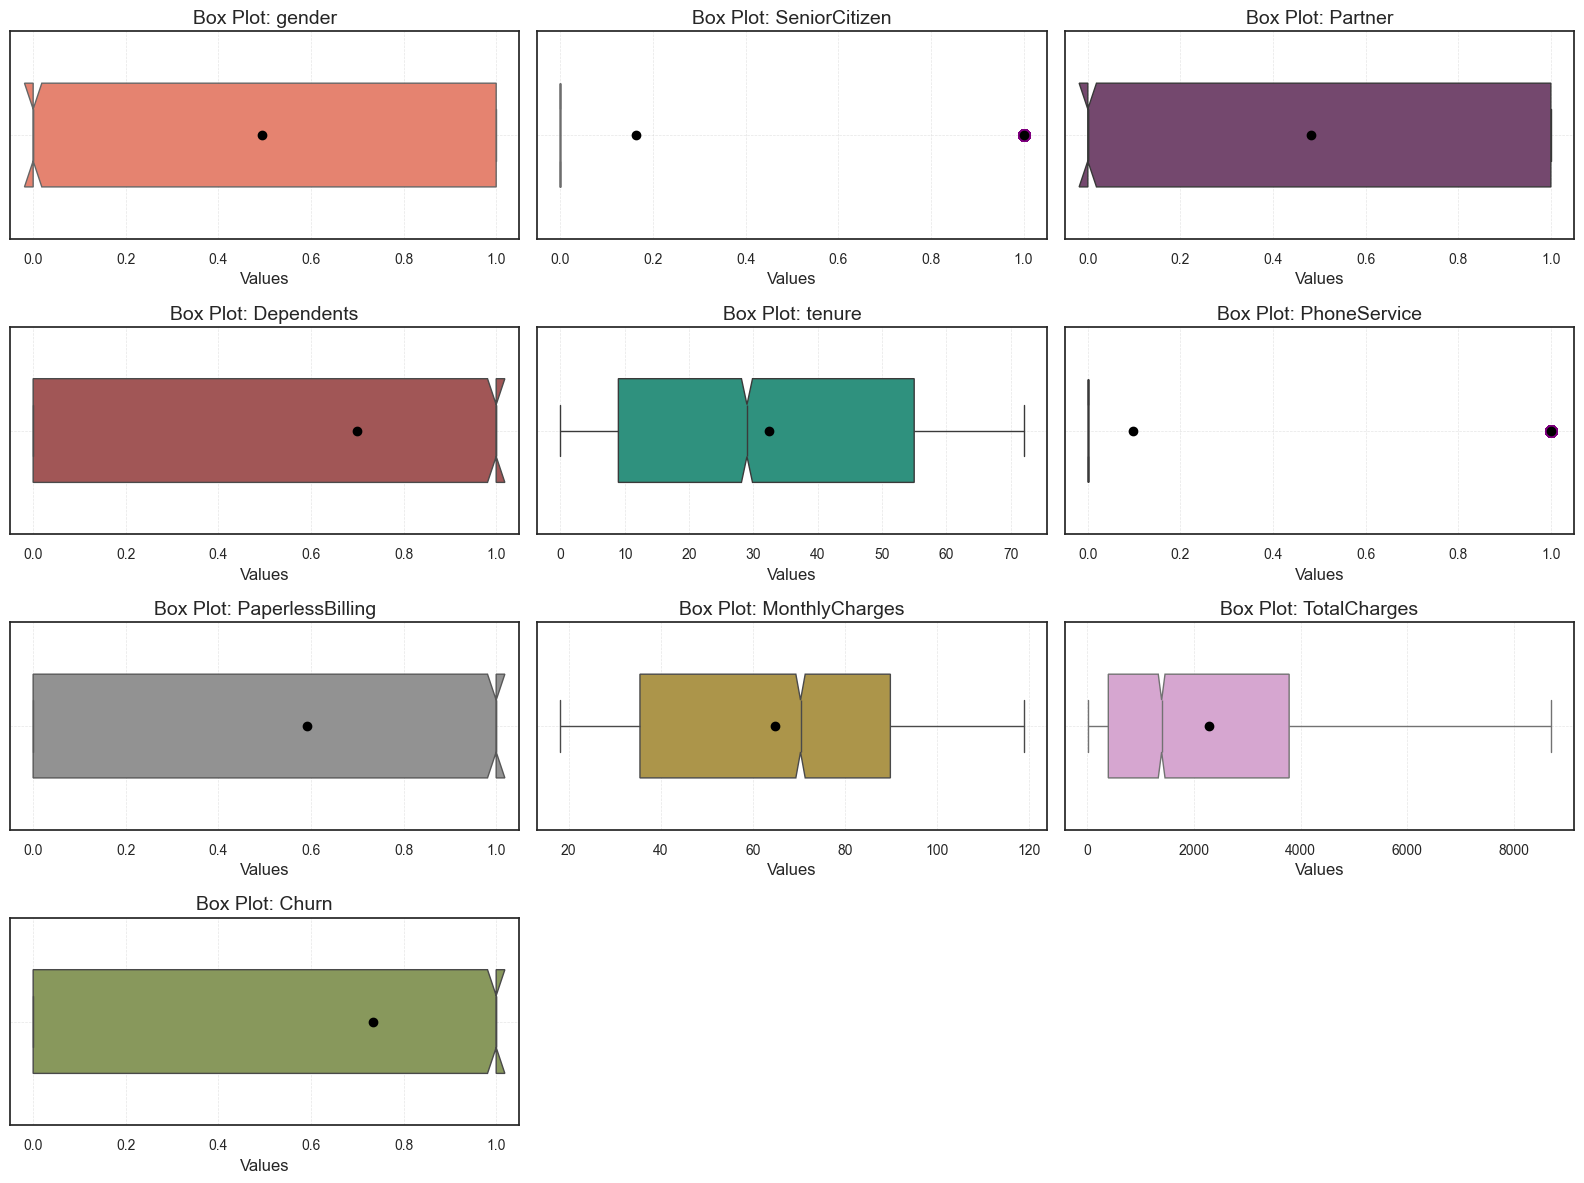

In [31]:
box_plot_all_columns(df, subplot_row = 3)

# Check the unbalance data

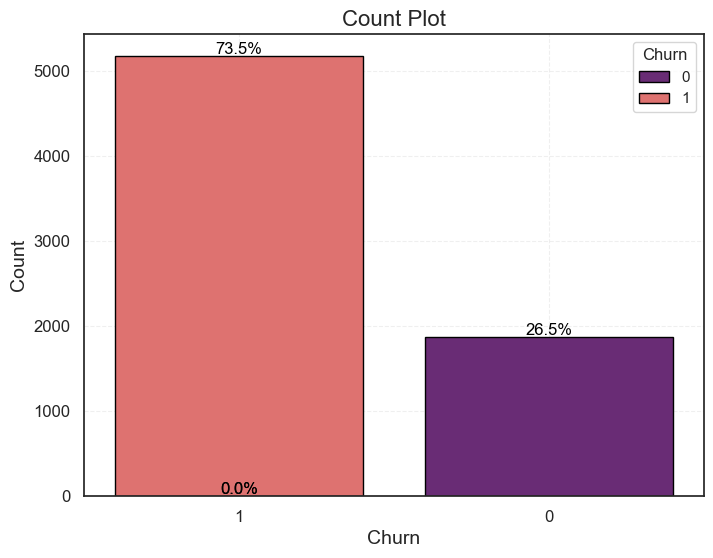

,count
name,
1,5174
0,1869


In [32]:
check_balance_classification(df,column_plot='Churn')

# Visualization

## chart

In [33]:
PaymentMethod_name = df['PaymentMethod'].value_counts().index.to_list()
PaymentMethod_values = df['PaymentMethod'].value_counts().values.tolist()
# pie_chart(labels=PaymentMethod_name, sizes=PaymentMethod_values, title="Payment Methods")
pie_chart_plotly(labels=PaymentMethod_name, sizes=PaymentMethod_values, title="Payment Methods")


In [34]:
InternetService_name = df['InternetService'].value_counts().index.to_list()
InternetService_values = df['InternetService'].value_counts().values.tolist()
# pie_chart(labels=InternetService_name, sizes=InternetService_values, title="Payment Methods")
pie_chart_plotly(labels=InternetService_name, sizes=InternetService_values, title="Internet Service")

In [35]:
Contract_name = df['Contract'].value_counts().index.to_list()
Contract_values = df['Contract'].value_counts().values.tolist()
# pie_chart(labels=Contract_name, sizes=Contract_values, title="Payment Methods")
pie_chart_plotly(labels=Contract_name, sizes=Contract_values, title="Contract")

## Multiple bar

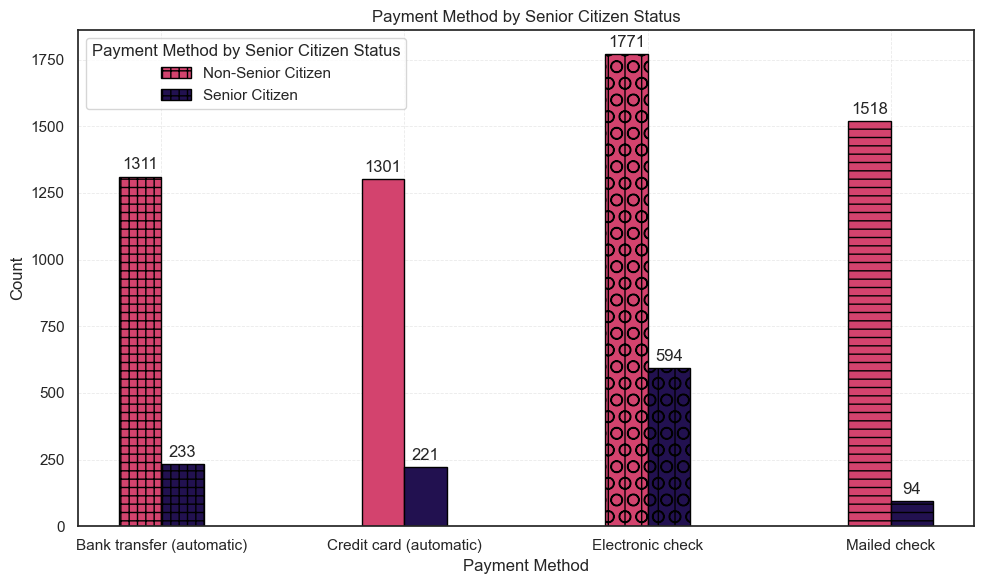

In [36]:
grouped_data = original_df.groupby(['PaymentMethod', 'SeniorCitizen']).size().unstack(fill_value=0)

categories = grouped_data.index.tolist()
datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
labels = ['Non-Senior Citizen', 'Senior Citizen']

multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='Payment Method by Senior Citizen Status', xlabel='Payment Method', ylabel='Count')

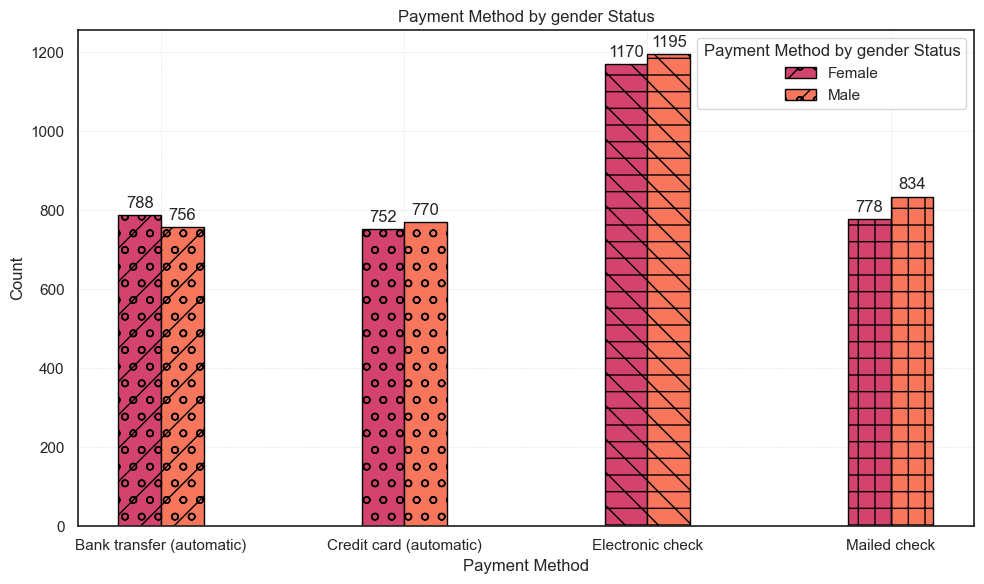

In [37]:
grouped_data = original_df.groupby(['PaymentMethod', 'gender']).size().unstack(fill_value=0)

categories = grouped_data.index.tolist()
datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
labels = ['Female', 'Male']

multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='Payment Method by gender Status', xlabel='Payment Method', ylabel='Count')

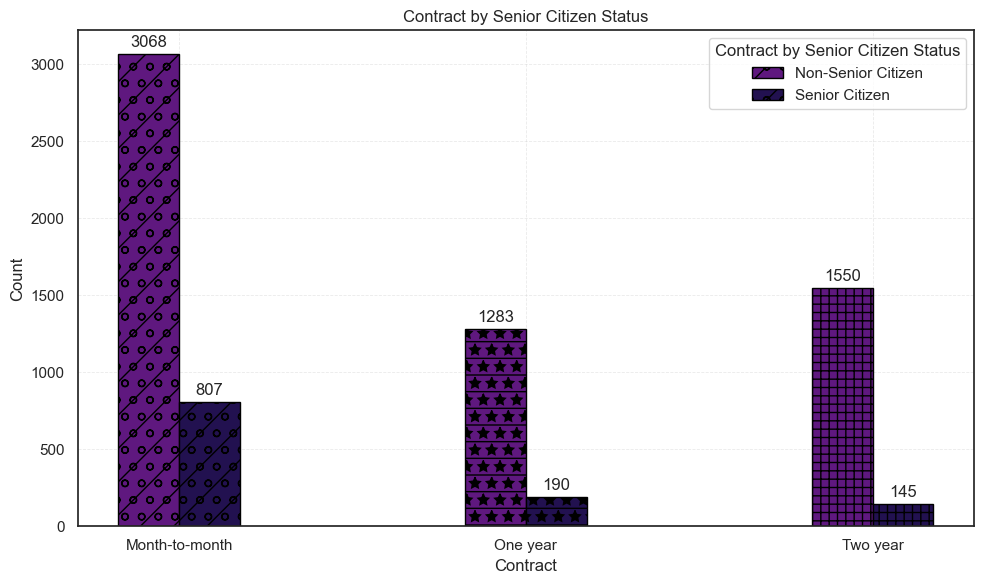

In [38]:
grouped_data = original_df.groupby(['Contract', 'SeniorCitizen']).size().unstack(fill_value=0)

categories = grouped_data.index.tolist()
datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
labels = ['Non-Senior Citizen', 'Senior Citizen']

multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='Contract by Senior Citizen Status', xlabel='Contract', ylabel='Count')

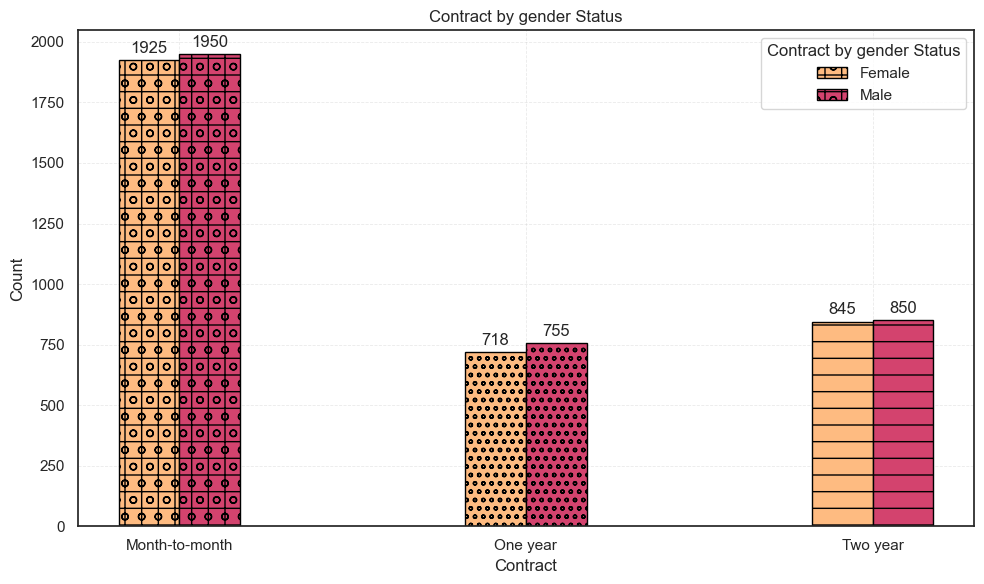

In [39]:
grouped_data = original_df.groupby(['Contract', 'gender']).size().unstack(fill_value=0)

categories = grouped_data.index.tolist()
datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
labels = ['Female', 'Male']

multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='Contract by gender Status', xlabel='Contract', ylabel='Count')

## Bar

In [40]:
column_counts = original_df['tenure'].value_counts().reset_index()
column_counts.columns = ['tenure', 'value']

bar_plot_plotly(df=column_counts, x='tenure', y='value', hue='value')

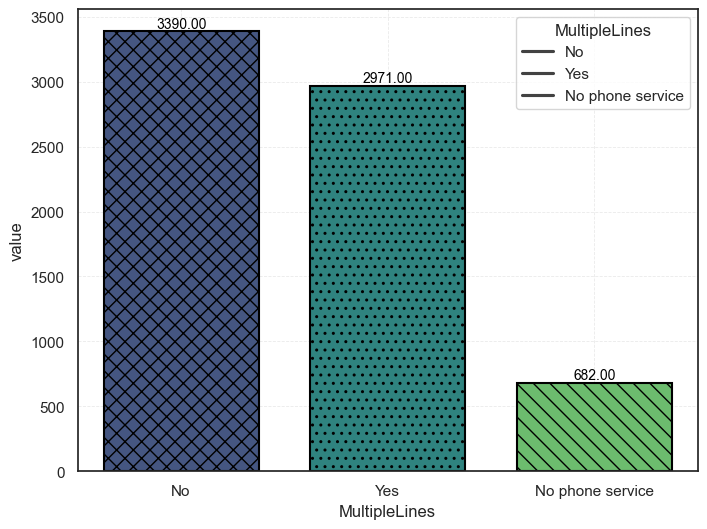

In [41]:
column_counts = original_df['MultipleLines'].value_counts().reset_index()
column_counts.columns = ['MultipleLines', 'value']

bar_plot_seaborn(df=column_counts, x='MultipleLines', y='value',palette='viridis')

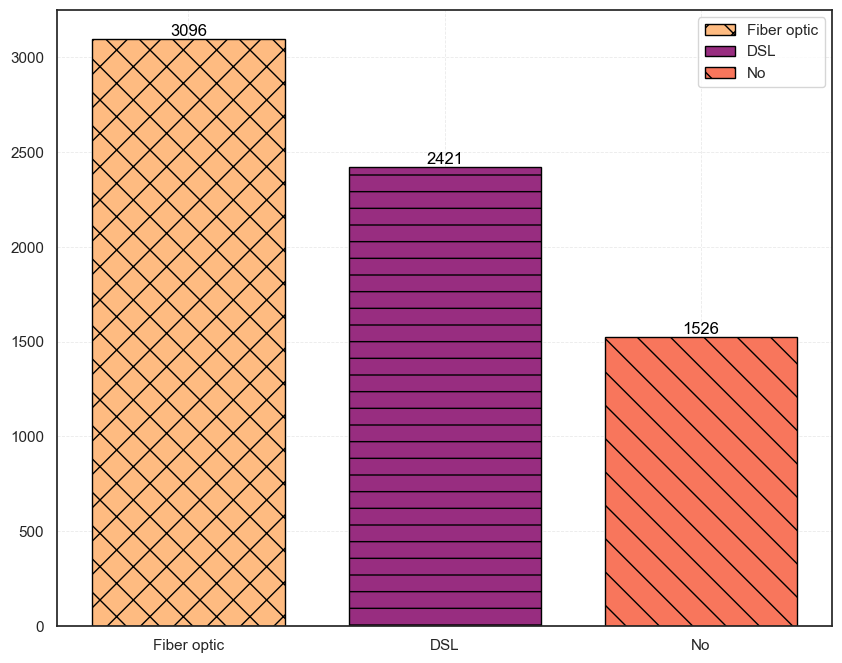

In [42]:
column_counts = original_df['InternetService'].value_counts().reset_index()
column_counts.columns = ['InternetService', 'value']

bar_plot_matplotlib(column_counts['InternetService'], column_counts['value'],x_rotation=0)

## count plot

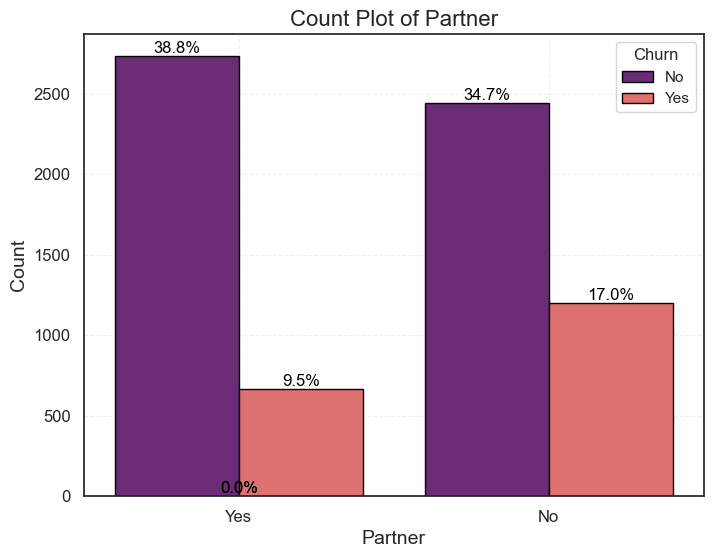

<Axes: title={'center': 'Count Plot of Partner'}, xlabel='Partner', ylabel='Count'>

In [43]:
count_plot(df=original_df , x='Partner' , hue='Churn')

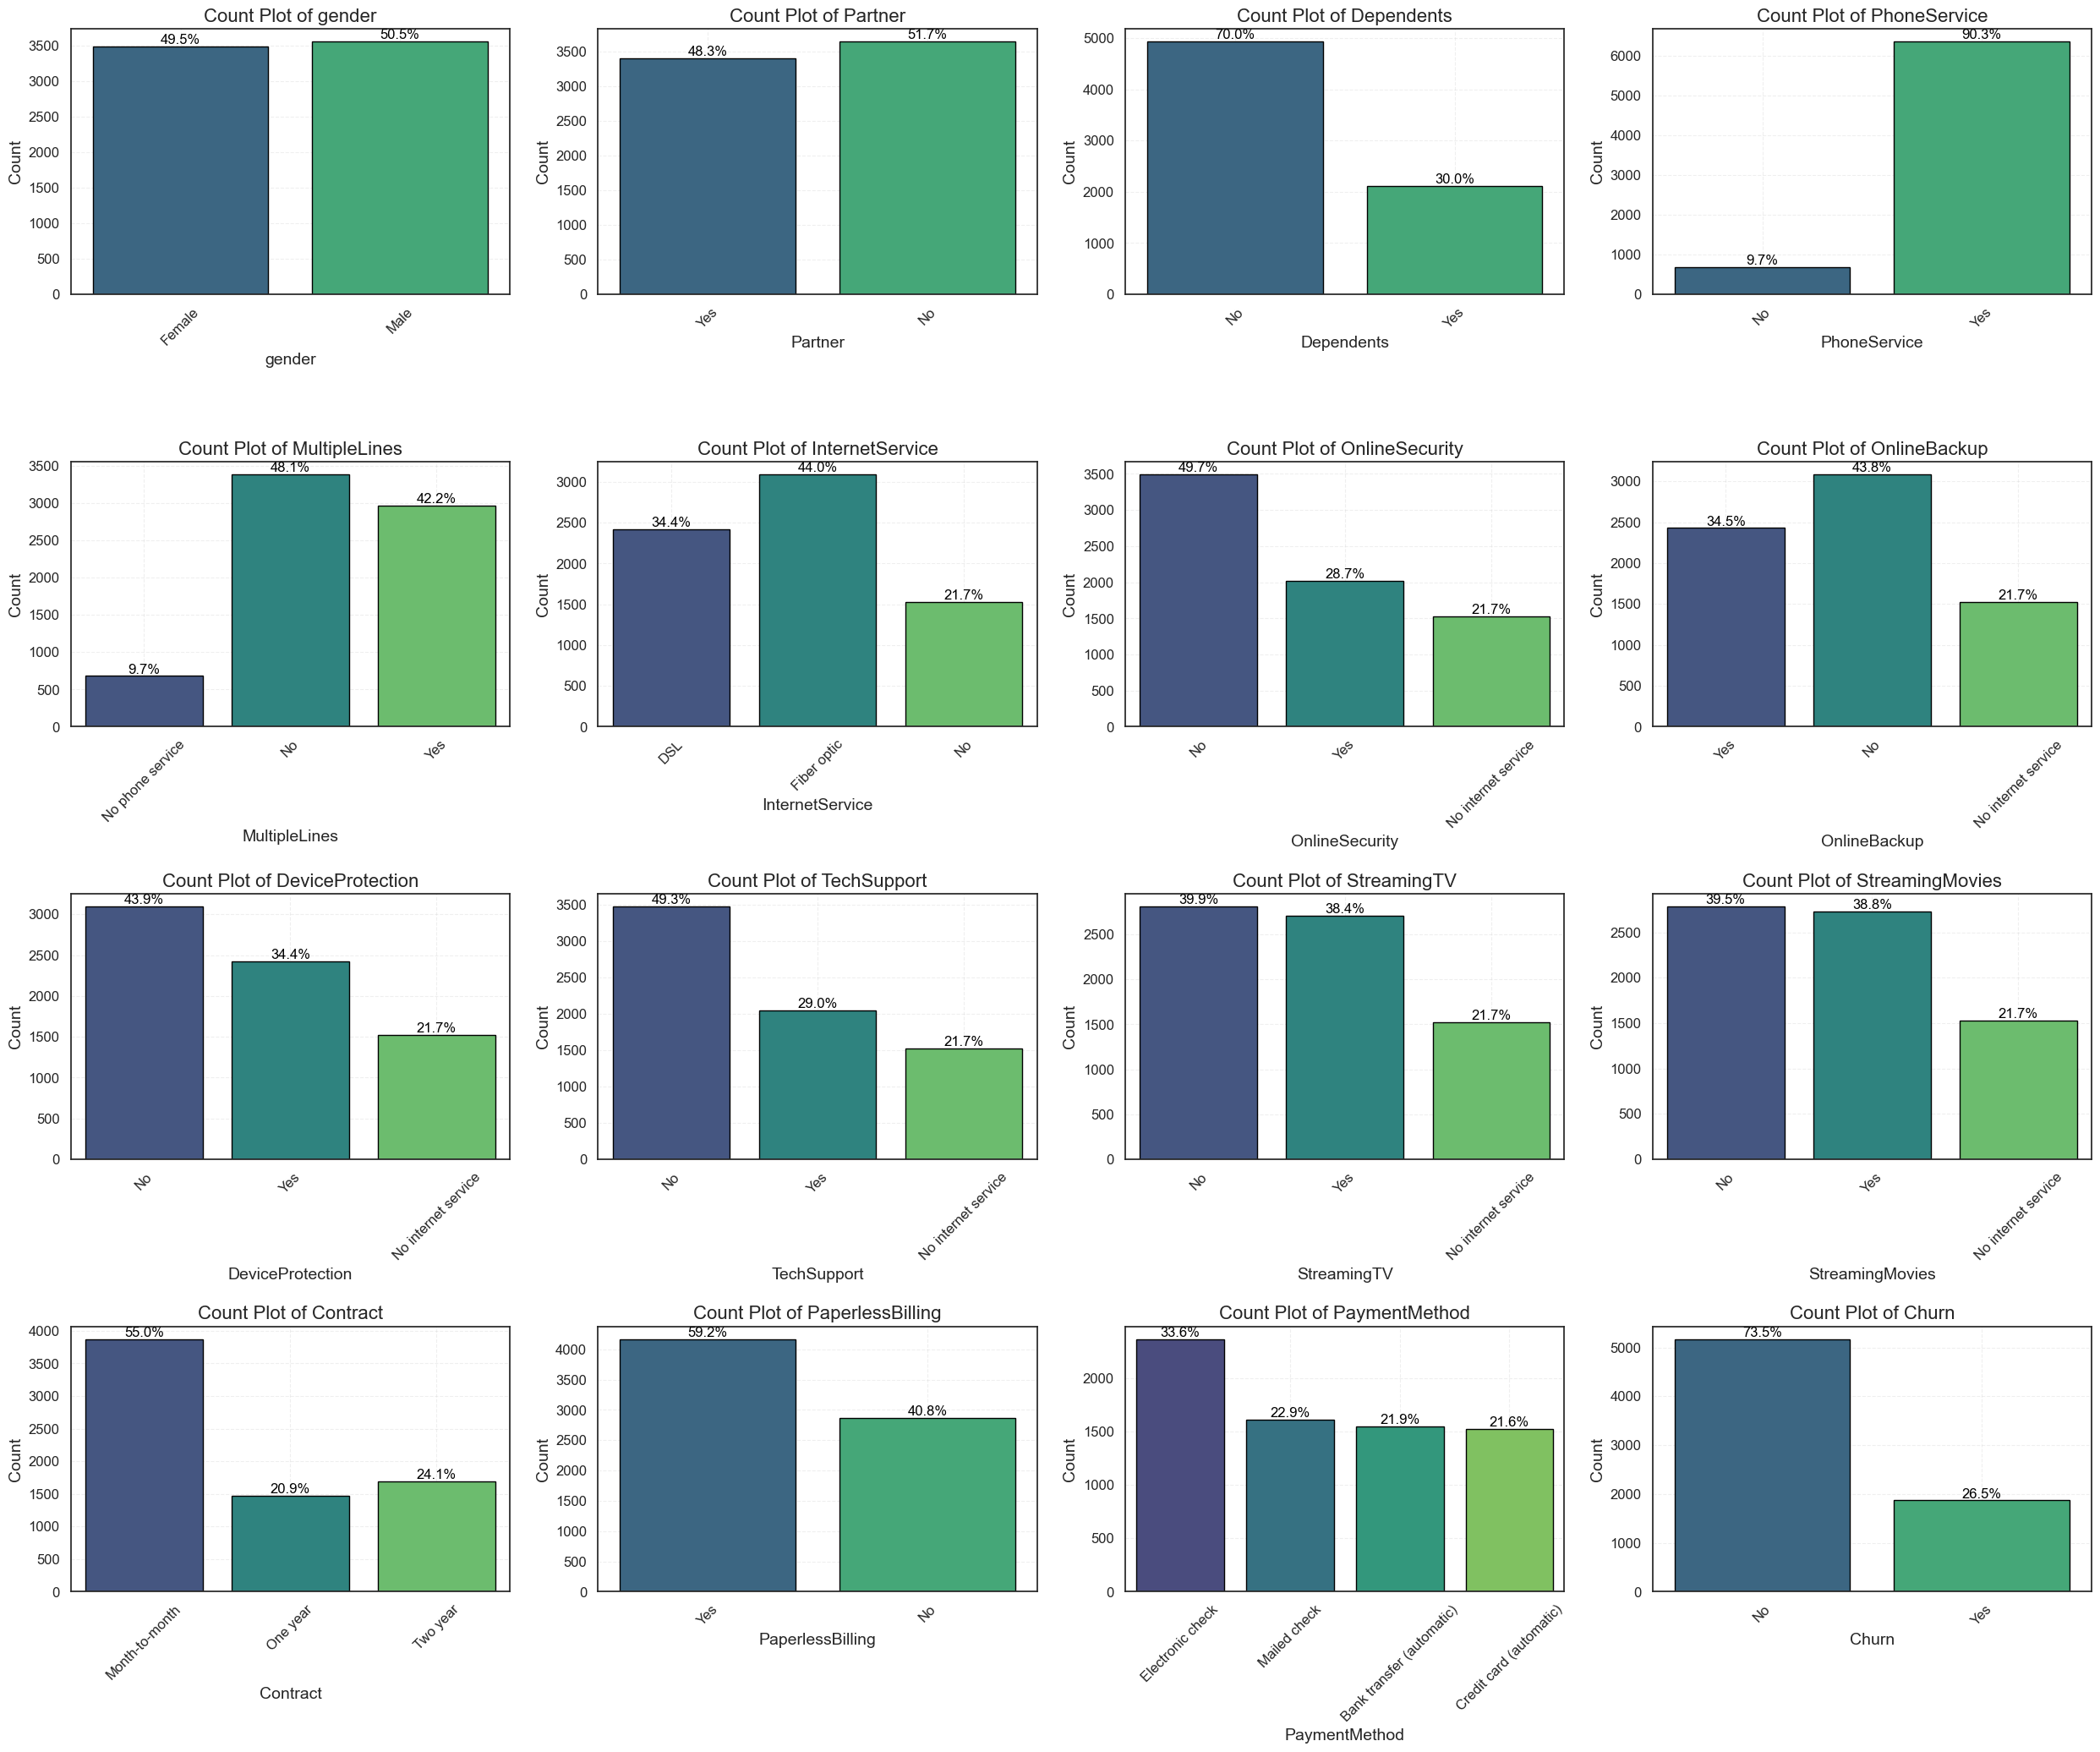

In [44]:
categorical_features=original_df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
count_plot_all_column(categorical_features, original_df, vision='x', num_of_column=4)

## Violin

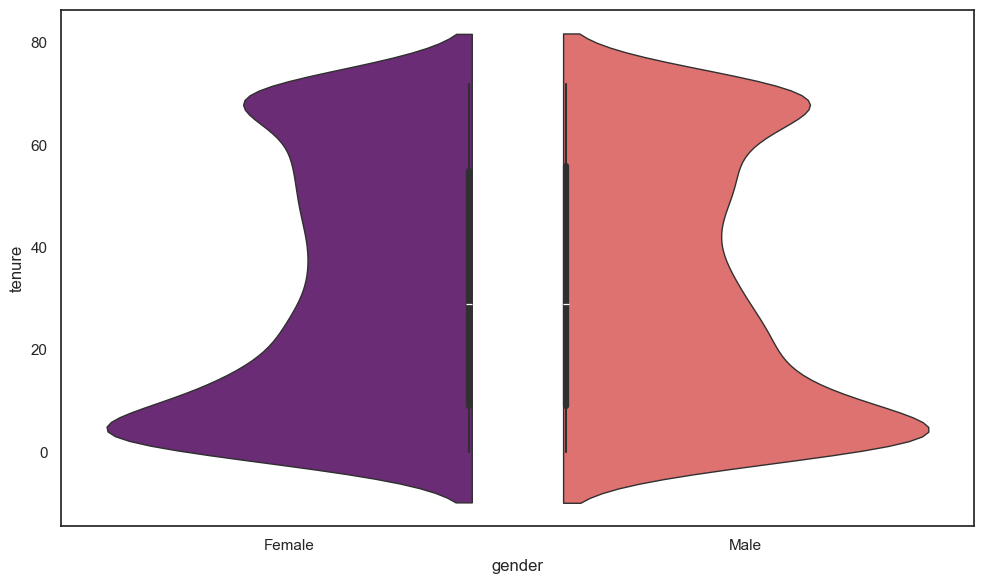

In [45]:
violin_plot(data=original_df, x='gender', y='tenure', hue='gender',split=True) #catagorical column in x and numircal in y

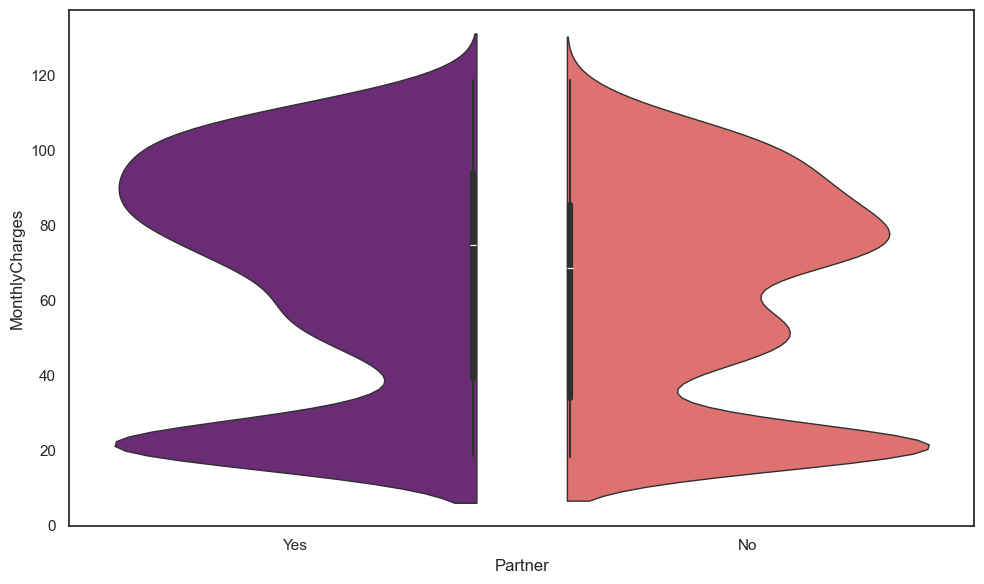

In [46]:
violin_plot(data=original_df, x='Partner', y='MonthlyCharges', hue='Partner',split=True) #catagorical column in x and numircal in y

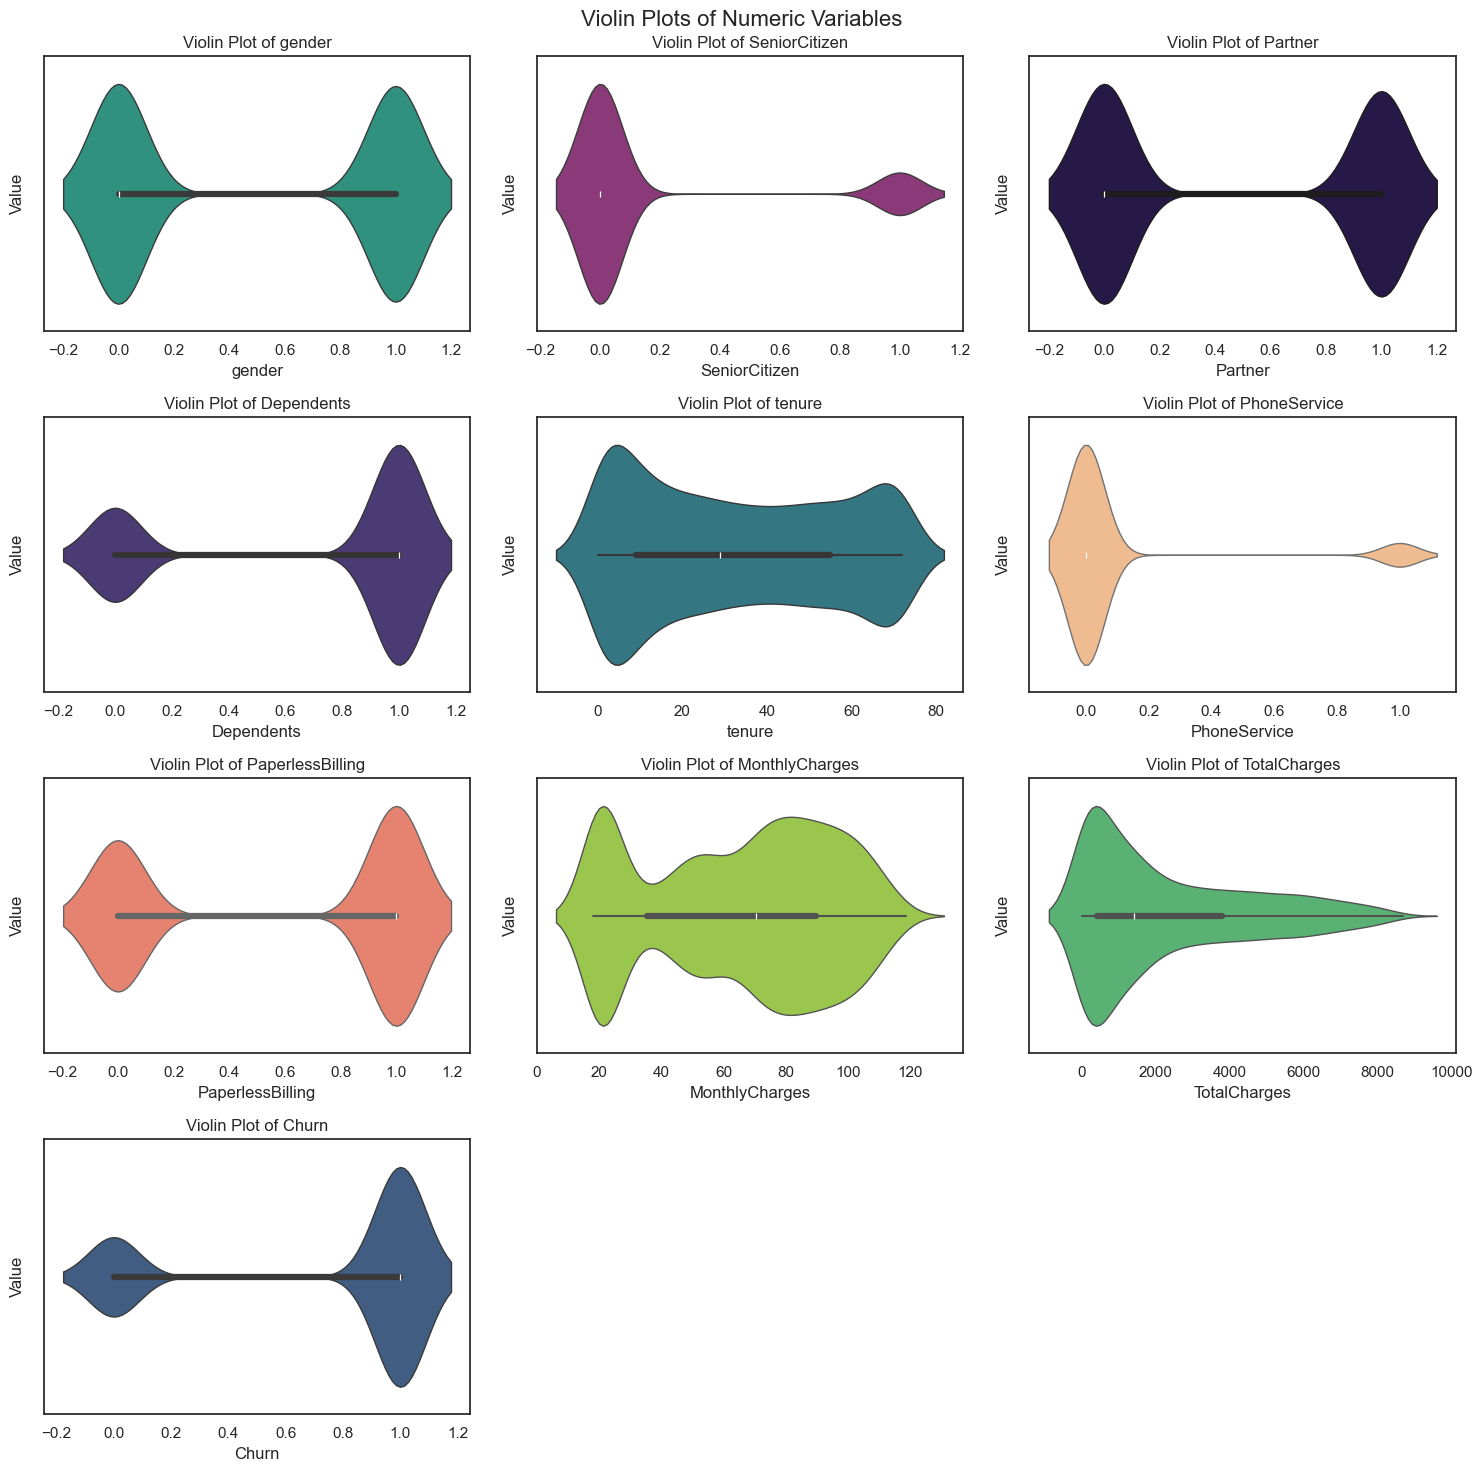

In [47]:
plot_violin_all_column(df)

## Histogram

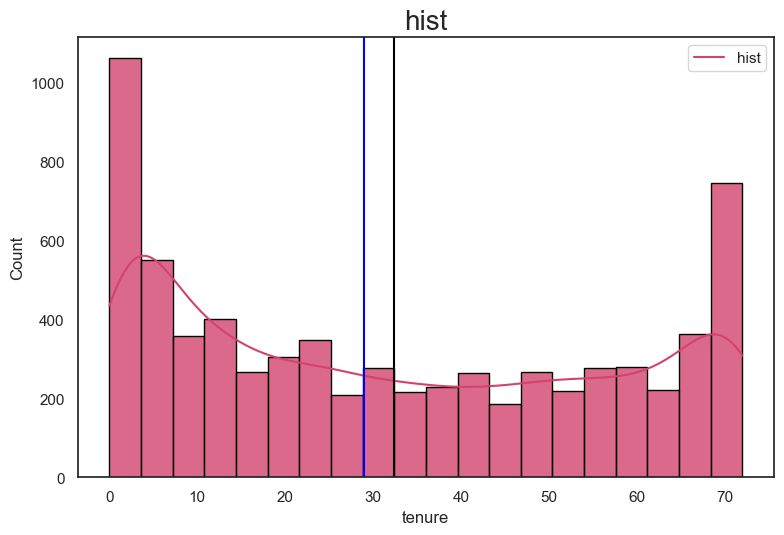

In [48]:
plot_single_histogram_seaborn(original_df,x='tenure', bins=20, palette='magma', show=False)
plt.axvline(np.mean(original_df["tenure"]) , color = "black" , label ="The Mean of the tenure")
plt.axvline(np.median(original_df["tenure"]) , color = "blue" , label ="The Median of the tenure")
plt.show()

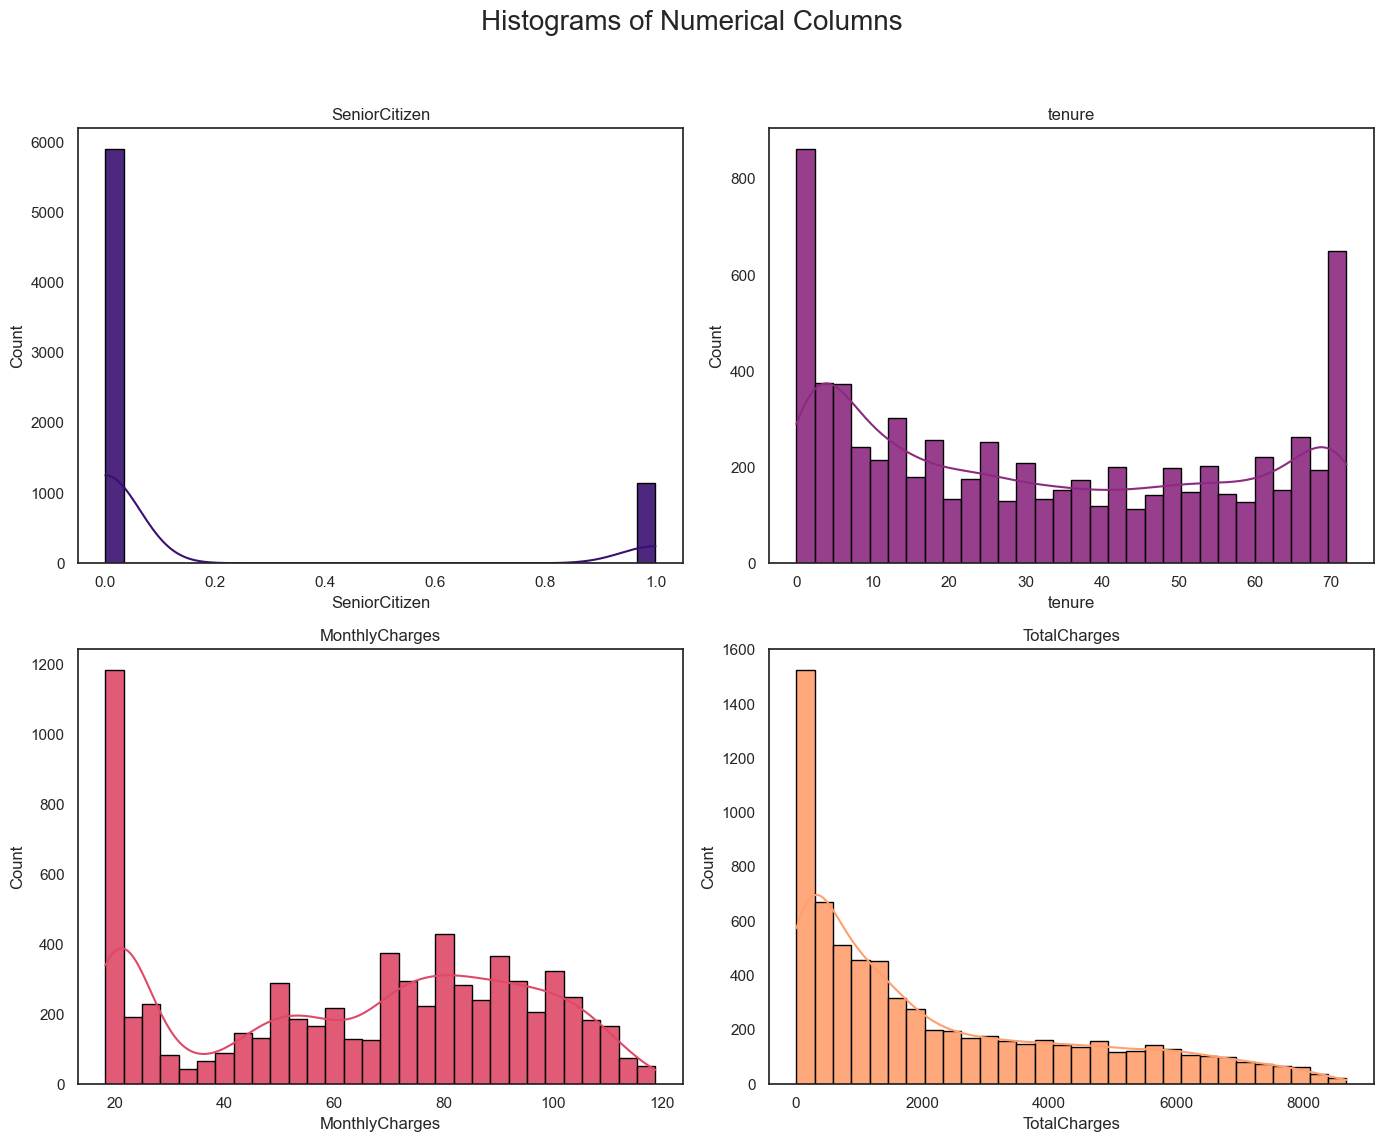

In [49]:
plot_histograms(original_df,column=None, bins=30)

# Correlation Coefficient

## Calculate Correlation

In [50]:
calculate_correlation(df, outcome_column='Churn',num_results=5)

Calculating Pearson correlation coefficients for numeric columns against the outcome column: {outcome_column}
Top 5 results:
           Variable  Pearson Coefficient        P-Value
4            tenure             0.352229  7.999058e-205
8      TotalCharges             0.199428   4.233836e-64
7    MonthlyCharges            -0.193356   2.706646e-60
6  PaperlessBilling            -0.191825   2.356554e-59
3        Dependents            -0.164221   9.140433e-44

tenure
The Pearson Correlation Coefficient for tenure is 0.3522 with a P-value of P = 7.999e-205

TotalCharges
The Pearson Correlation Coefficient for TotalCharges is 0.1994 with a P-value of P = 4.234e-64

MonthlyCharges
The Pearson Correlation Coefficient for MonthlyCharges is -0.1934 with a P-value of P = 2.707e-60

PaperlessBilling
The Pearson Correlation Coefficient for PaperlessBilling is -0.1918 with a P-value of P = 2.357e-59

Dependents
The Pearson Correlation Coefficient for Dependents is -0.1642 with a P-value of P = 9.14

,Variable,Pearson Coefficient,P-Value
4,tenure,0.352229,7.999058e-205
8,TotalCharges,0.199428,4.233836e-64
7,MonthlyCharges,-0.193356,2.706646e-60
6,PaperlessBilling,-0.191825,2.356554e-59
3,Dependents,-0.164221,9.140433e-44


## Visualize Correlation with Bars

In [107]:
df_corr = df.corr()['Churn'].sort_values(ascending = False)
df_corr_index = df_corr.index.to_list()
df_corr_values = df_corr.values.tolist()
df_corr = pd.DataFrame({'name': df_corr_index, 'values':df_corr_values})
bar_plot_plotly(df=df_corr, x='name', y='values',hue='values', width=1500, height=650)

## Visualize Correlation with Heatmap

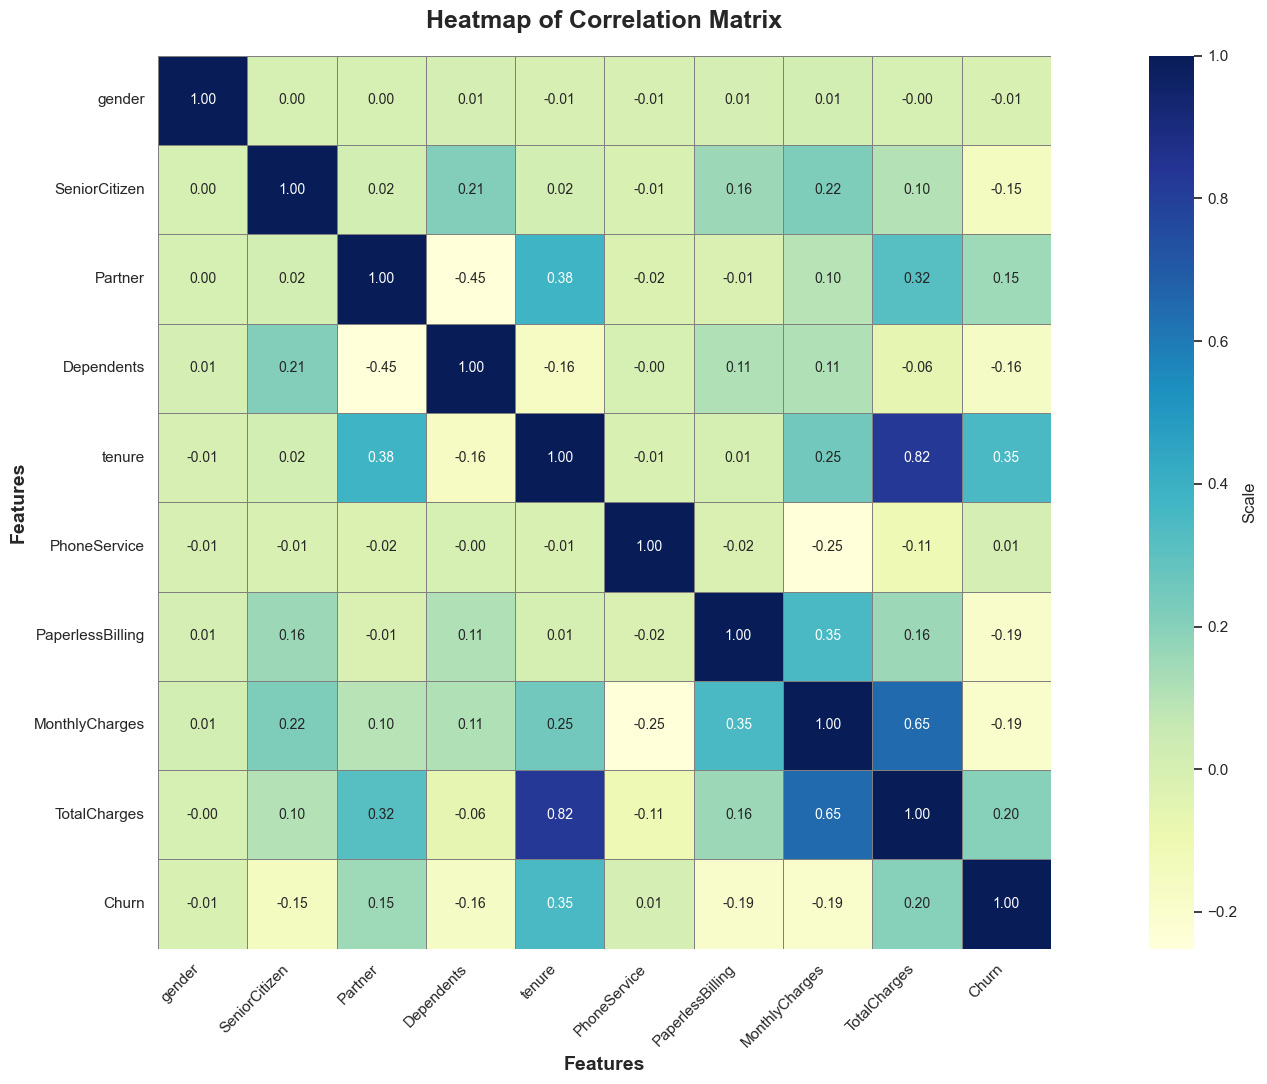

In [52]:
correlations = Heatmap_Correlation(df, mask=-1)

# Data Encoding

In [53]:
df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

In [54]:
column = ['MultipleLines',
        'InternetService',
        'OnlineSecurity',
        'OnlineBackup',
        'DeviceProtection',
        'TechSupport',
        'StreamingTV',
        'StreamingMovies',
        'Contract',
        'PaymentMethod']

df = encode_column(df, columns = column, method='get_dummies')

# df = encode_column(df, columns = '', method= 'label')
# df = encode_column(df, columns = 'City', method='target',target="Churn Value")
# ordinal_categories = df['Dependents'].value_counts().index.to_list()
# df = encode_column(df, columns = '', method= 'ordinal', ordinal_categories=ordinal_categories)

df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

[]

In [55]:
len(df.columns)

31

## Make the target is last column

In [56]:
df = target_last_col(df,'Churn')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,0,1,1,1,1,1,29.85,29.85,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,0,0,0,1,34,0,0,56.95,1889.50,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
2,0,0,0,1,2,0,1,53.85,108.15,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0,0,0,1,45,1,0,42.30,1840.75,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,1,0,0,1,2,0,1,70.70,151.65,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


# Repair unbalanced data by using oversampling and undersampling.

In [57]:
x, y = get_x_y(df, target='Churn')

In [58]:
df, x, y = over_under_sampling_classification(x, y, over_sampling_strategy=0.75, n_jobs=1)

Starting over-sampling and/or under-sampling process.
Initial class distribution: Counter({1: 5174, 0: 1869})

use SVMSMOTE model for oversampling
Applying SVMSMOTE with strategy 0.75


  File "c:\Users\PC\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


after oversampling class distribution: Counter({1: 5174, 0: 3880})

use TomekLinks model for undersampling
Applying TomekLinks under-sampling.
after undersampling class distribution: Counter({1: 4746, 0: 3880})

Final class distribution: Counter({1: 4746, 0: 3880})
Over-sampling and/or under-sampling process completed.


### Check the unbalance data after repair 

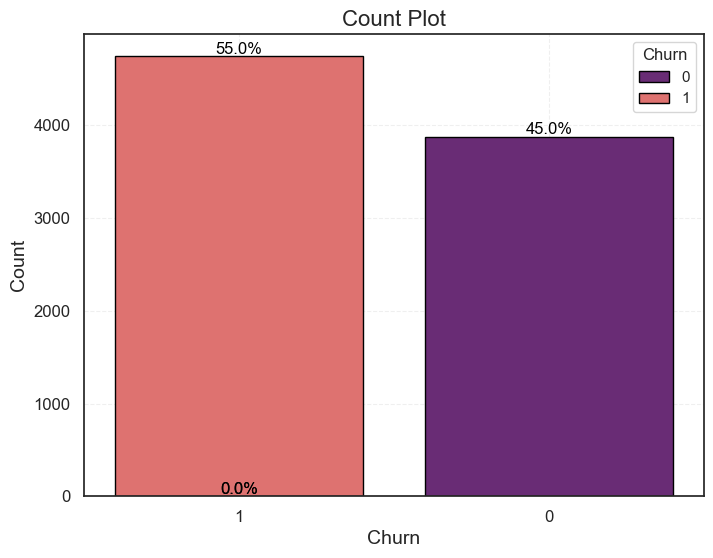

,count
name,
1,4746
0,3880


In [59]:
check_balance_classification(df,column_plot='Churn')

# Get X , Y (TVT)

In [60]:
x.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [61]:
x_train, y_train, x_valid, y_valid, x_test, y_test = get_x_y_TVT(df, target='Churn')

In [62]:
get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid, x_test, y_test)

x_train shape = (6072, 30)
x_valid shape = (828, 30)
x_test shape = (1726, 30)
y_train shape = (6072,)
y_valid shape = (828,)
y_test shape = (1726,)


# Get train, valid and test data in same time

In [63]:
# df.columns.tolist()
# x_train , y_train ,x_valid , y_valid , x_test , y_test = train_valid_test_split(df , target='Churn Value',train_size=0.7,valid_size=0.1,test_size=0.2,random_state=42)
# get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid , x_test, y_test)

# Scaling

In [64]:
x_train, x_valid, x_test = scale_data(x_train, x_valid, x_test)

# Feature Selection

In [65]:
print(len(df.columns))

31


In [66]:
x_train, x_test, x_valid, FS_model = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, x_valid=x_valid, method='SelectKBest', stat_method='f_classif', k=20)
selected_mask = FS_model.get_support()

x_column_name = x
x = FS_model.transform(x)

# Get selected and dropped columns
selected_columns = x_column_name.columns[selected_mask]
dropped_columns = x_column_name.columns[~selected_mask]

# Dimensionality Reduction

In [67]:
# print(len(df.columns))

In [68]:
# x_train, x_test, x_valid, DR_model = dimensionality_reduction(x_train=x_train, x_test=x_test, x_valid=x_valid, y_train=y_train, method= 'LDA', n_components=20)
# x = DR_model.transform(x)

# Train

In [69]:
models_names = ['XGBoost', 'RandomForest', 'SVM', 'Stacking']
models_values = []

## XGBoost_model

In [70]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [71]:
best_params, best_score, best_estimator = grid_search_classifier('XGBoost', x_train, y_train, cv=type_cross_valid, scoring='f1')

print('best_params =',best_params)
print('best_params =',best_score)

best_params = {'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100}
best_params = 0.8547595464155264


In [72]:
XGBoost_model = best_estimator
XGBoost_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

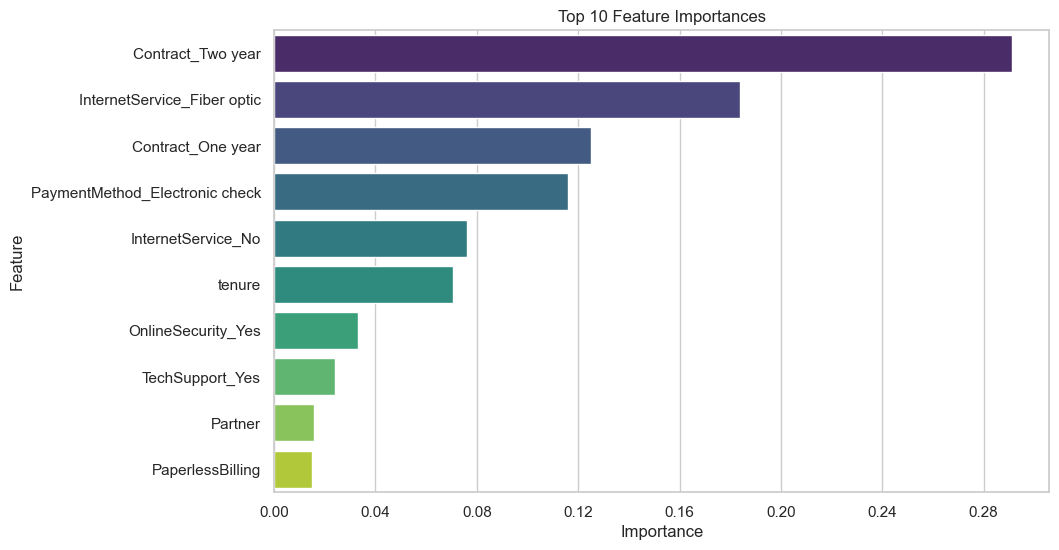

In [73]:
plot_feature_importance(XGBoost_model, x_train, selected_columns, top_n='first')

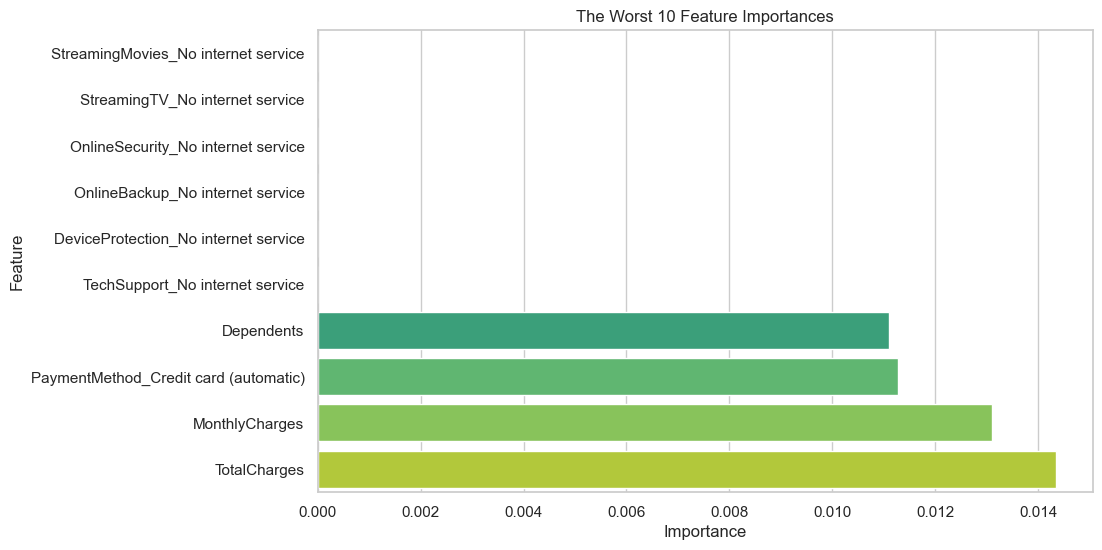

In [74]:
plot_feature_importance(XGBoost_model, x_train, selected_columns, top_n='last')

### Check Overfitting

Accuracy:
Training Accuracy: 0.8536
Validation Accuracy: 0.8370

Precision:
Training Precision: 0.8541
Validation Precision: 0.8375

Recall:
Training Recall: 0.8536
Validation Recall: 0.8370

F1-Score:
Training F1-Score: 0.8537
Validation F1-Score: 0.8371

MCC:
Training MCC: 0.7049
Validation MCC: 0.6729

Balanced Accuracy:
Training Balanced Accuracy: 0.8531
Validation Balanced Accuracy: 0.8370

Confusion Matrix:
Validation Confusion Matrix:
[[320  62]
 [ 73 373]]

Cross-Validation(CV):
Cross-Validation Scores: [0.83893395 0.82434783 0.84637681 0.8515942  0.82666667]
Cross-Validation Mean Score: 0.8376


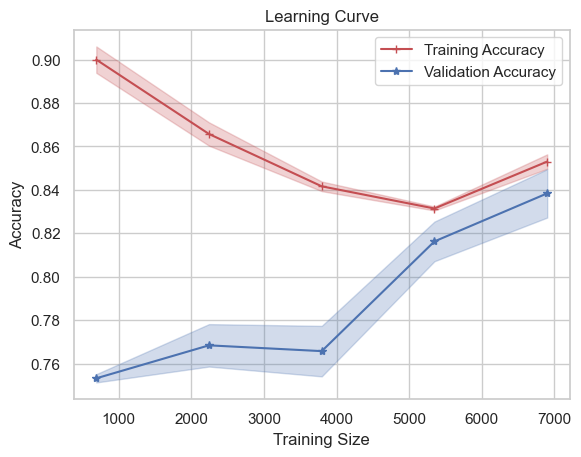

ROC AUC: 0.9198


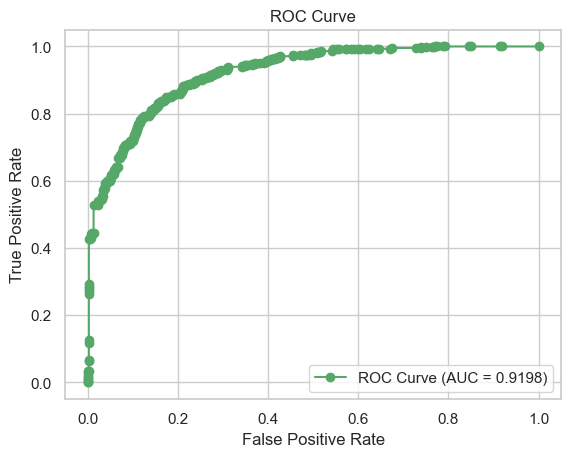

In [75]:
Check_Overfitting_Classification(XGBoost_model,x,y,x_train,y_train,x_valid,y_valid)

### Get y_predict

In [76]:
y_pred = XGBoost_model.predict(x_test)

### Evaluate model

#### Confusion Matrix

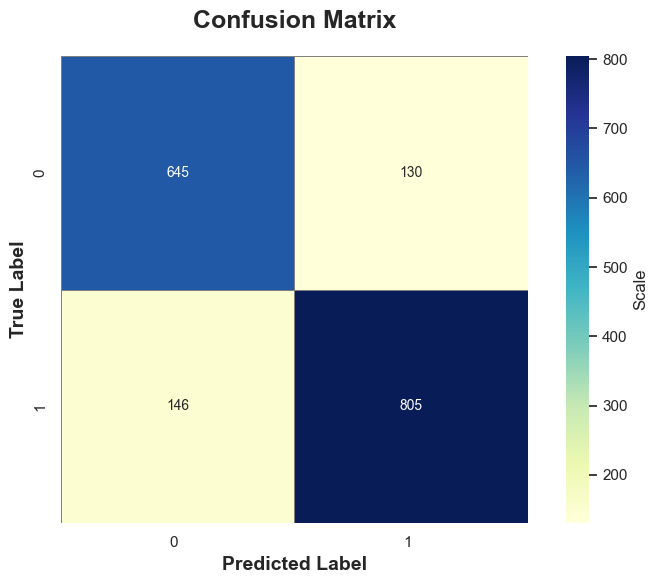

In [77]:
plot_confusion_matrix(y_test, y_pred)

#### accuracy,recall,precision,f1 and roc_auc

Accuracy score = 0.8401
Recall score = 0.8465
Precision score = 0.8610
F1 score = 0.8537
ROC AUC score = 0.8394


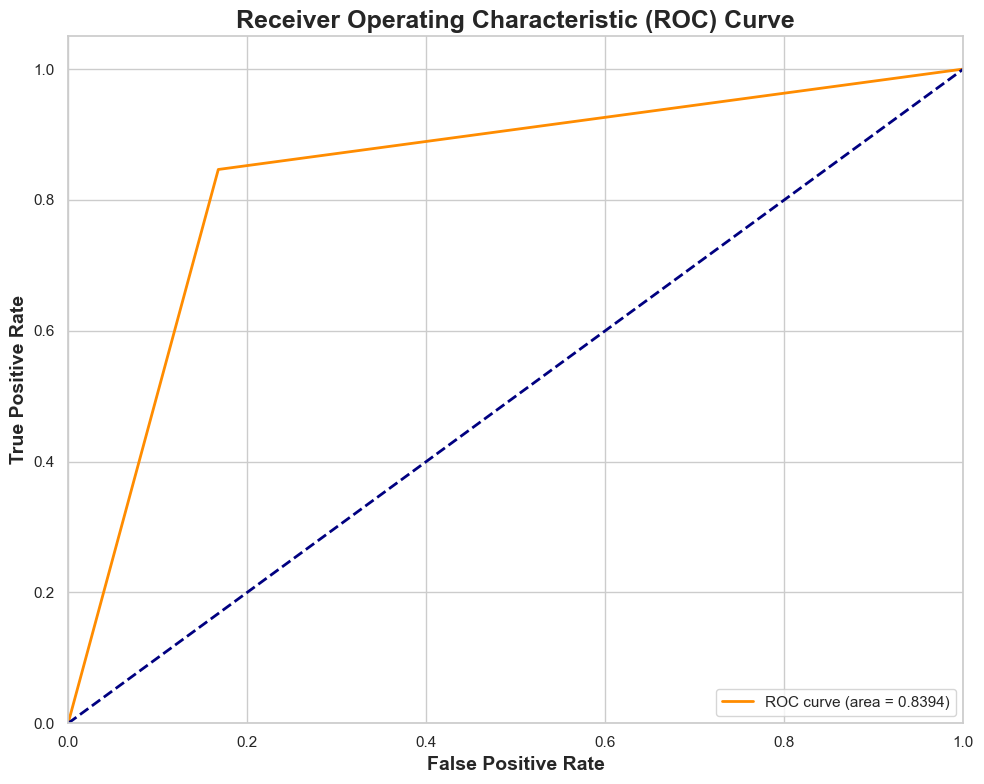

In [78]:
accuracy, recall, precision, f1, roc_auc = evaluate_model_Classification(y_test, y_pred)
models_values.append([accuracy, recall, precision, f1, roc_auc])

## RandomForest_model

In [79]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [80]:
best_params, best_score, best_estimator = grid_search_classifier('RandomForest', x_train, y_train, cv=type_cross_valid, scoring='f1')

print('best_params =',best_params)
print('best_params =',best_score)

best_params = {'max_depth': 10, 'n_estimators': 200}
best_params = 0.8540894617361104


In [81]:
RandomForest_model = best_estimator
RandomForest_model

RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1)

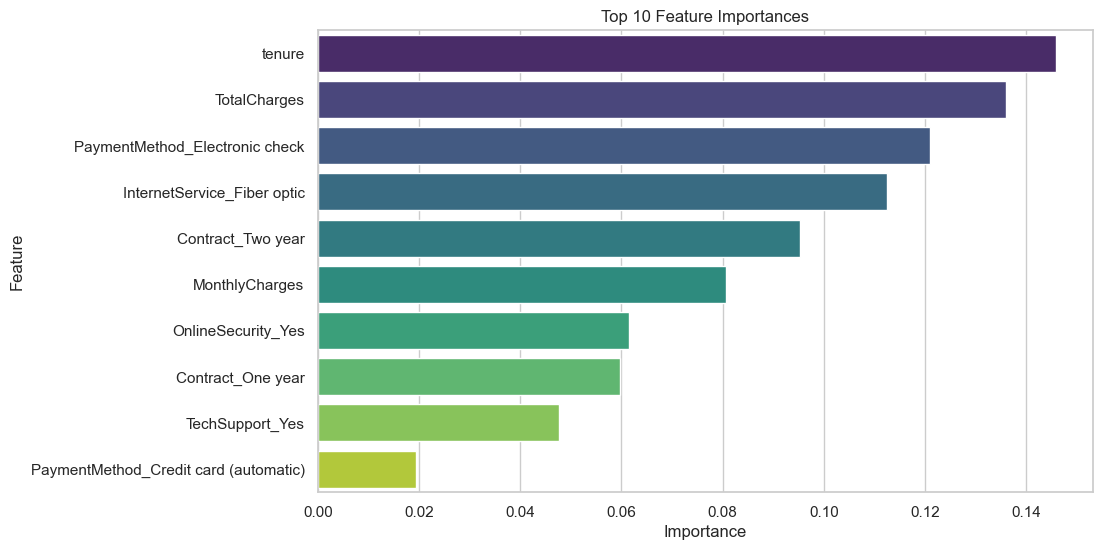

In [82]:
plot_feature_importance(RandomForest_model, x_train, selected_columns, top_n='first')

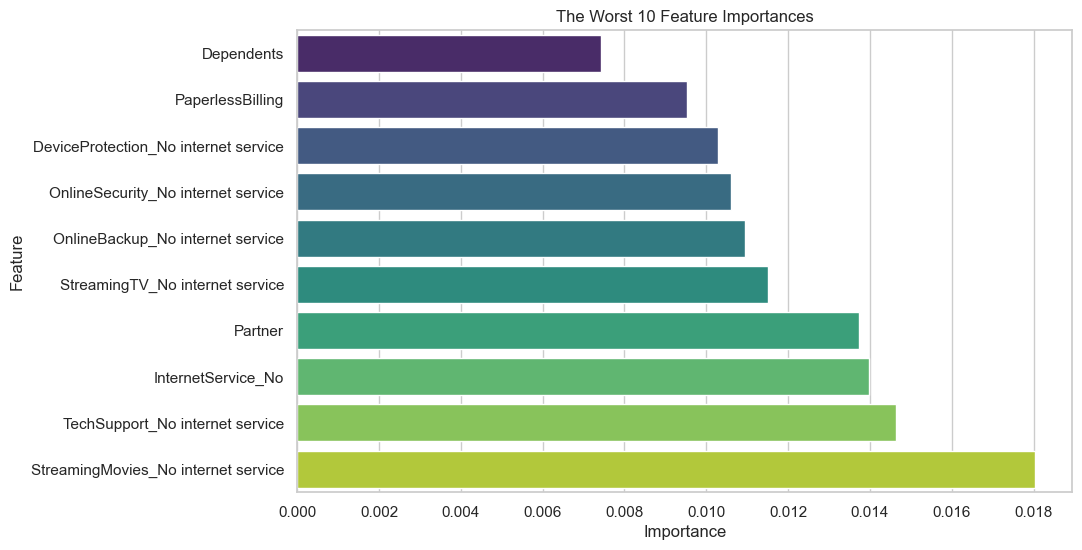

In [83]:
plot_feature_importance(RandomForest_model, x_train, selected_columns, top_n='last')

### Check Overfitting

Accuracy:
Training Accuracy: 0.8776
Validation Accuracy: 0.8321

Precision:
Training Precision: 0.8789
Validation Precision: 0.8326

Recall:
Training Recall: 0.8776
Validation Recall: 0.8321

F1-Score:
Training F1-Score: 0.8779
Validation F1-Score: 0.8322

MCC:
Training MCC: 0.7545
Validation MCC: 0.6630

Balanced Accuracy:
Training Balanced Accuracy: 0.8786
Validation Balanced Accuracy: 0.8320

Confusion Matrix:
Validation Confusion Matrix:
[[317  65]
 [ 74 372]]

Cross-Validation(CV):
Cross-Validation Scores: [0.8400927  0.83362319 0.84173913 0.85565217 0.82550725]
Cross-Validation Mean Score: 0.8393


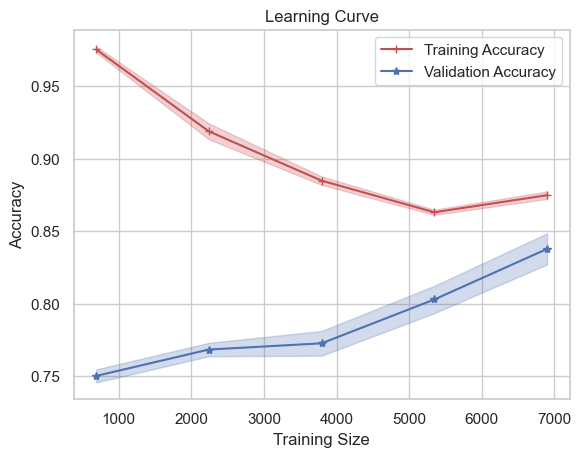

ROC AUC: 0.9113


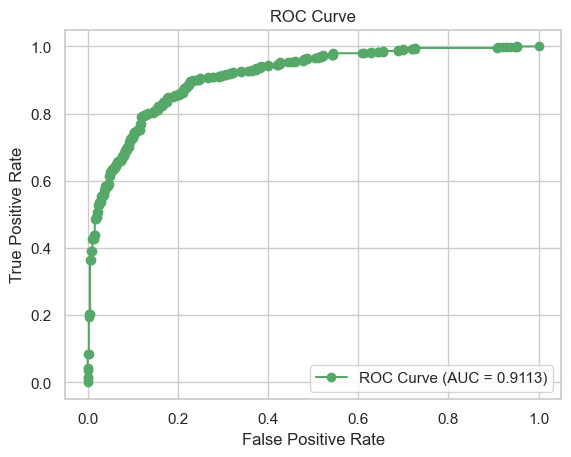

In [84]:
Check_Overfitting_Classification(RandomForest_model,x,y,x_train,y_train,x_valid,y_valid)

### Get y_predict

In [85]:
y_pred = RandomForest_model.predict(x_test)

### Evaluate model

#### Confusion Matrix

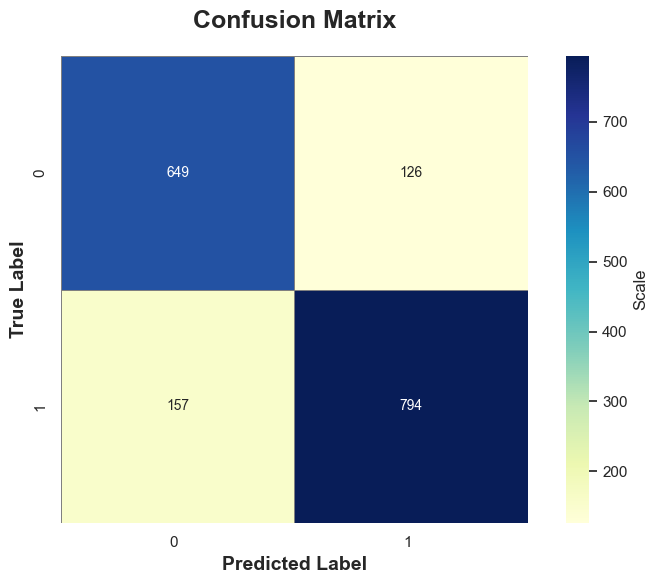

In [86]:
plot_confusion_matrix(y_test, y_pred)

#### accuracy,recall,precision,f1 and roc_auc

Accuracy score = 0.8360
Recall score = 0.8349
Precision score = 0.8630
F1 score = 0.8487
ROC AUC score = 0.8362


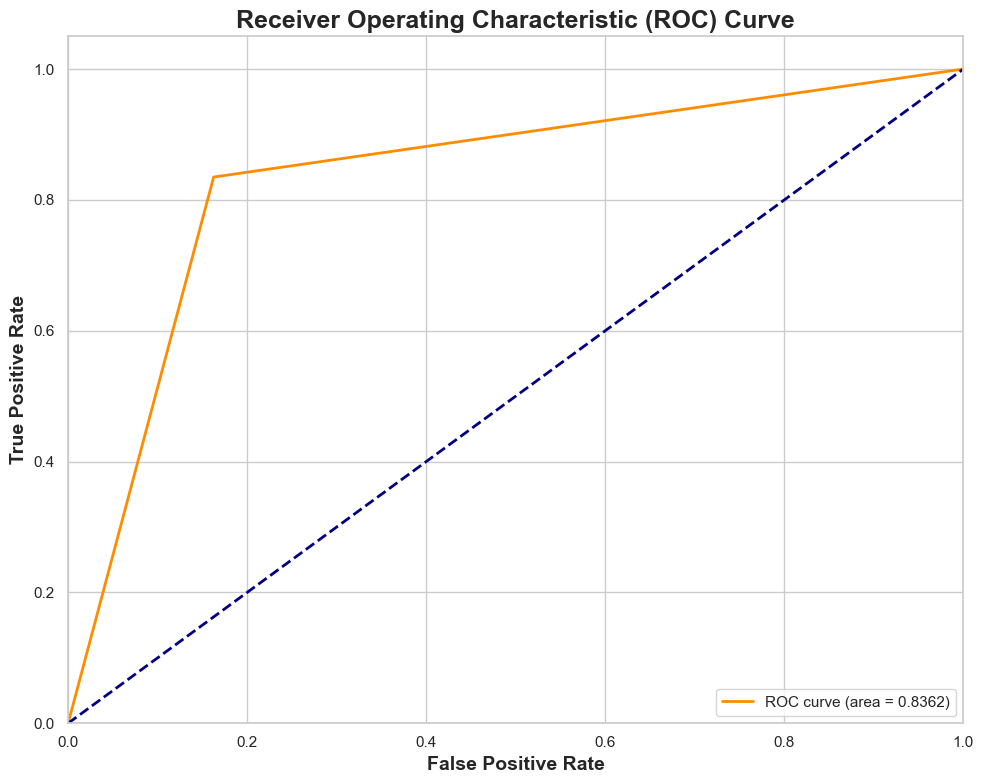

In [87]:
accuracy, recall, precision, f1, roc_auc = evaluate_model_Classification(y_test, y_pred)
models_values.append([accuracy, recall, precision, f1, roc_auc])

## SVM_model

In [88]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [89]:
best_params, best_score, best_estimator = grid_search_classifier('SVM', x_train, y_train, cv=type_cross_valid, scoring='f1')

print('best_params =',best_params)
print('best_params =',best_score)

best_params = {'C': 10, 'kernel': 'rbf'}
best_params = 0.8205509820388401


In [90]:
SVM_model = best_estimator
SVM_model

SVC(C=10)

In [91]:
plot_feature_importance(SVM_model, x_train, selected_columns, top_n='first')

Model does not have feature importances or coefficients.


In [92]:
plot_feature_importance(SVM_model, x_train, selected_columns, top_n='last')

Model does not have feature importances or coefficients.


### Check Overfitting

Accuracy:
Training Accuracy: 0.8327
Validation Accuracy: 0.8056

Precision:
Training Precision: 0.8339
Validation Precision: 0.8076

Recall:
Training Recall: 0.8327
Validation Recall: 0.8056

F1-Score:
Training F1-Score: 0.8330
Validation F1-Score: 0.8058

MCC:
Training MCC: 0.6637
Validation MCC: 0.6117

Balanced Accuracy:
Training Balanced Accuracy: 0.8330
Validation Balanced Accuracy: 0.8067

Confusion Matrix:
Validation Confusion Matrix:
[[314  68]
 [ 93 353]]

Cross-Validation(CV):
Cross-Validation Scores: [0.74855156 0.7426087  0.74202899 0.75362319 0.74376812]
Cross-Validation Mean Score: 0.7461


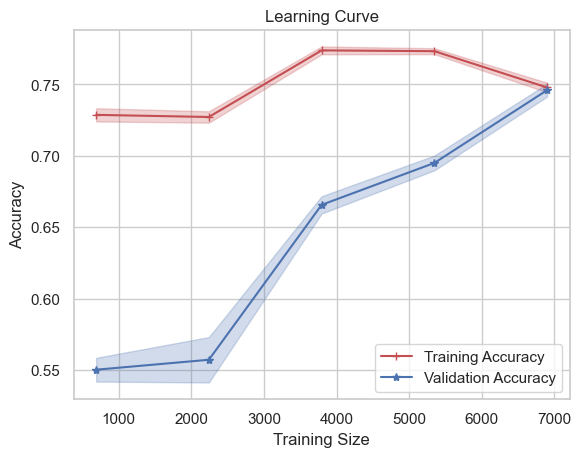

ROC AUC: Not available for this model


In [93]:
Check_Overfitting_Classification(SVM_model,x,y,x_train,y_train,x_valid,y_valid)

### Get y_predict

In [94]:
y_pred = SVM_model.predict(x_test)

### Evaluate model

#### Confusion Matrix

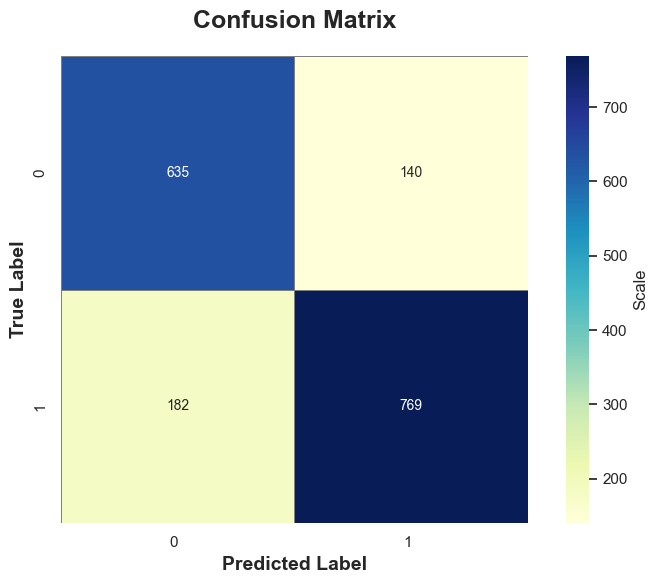

In [95]:
plot_confusion_matrix(y_test, y_pred)

#### accuracy,recall,precision,f1 and roc_auc

Accuracy score = 0.8134
Recall score = 0.8086
Precision score = 0.8460
F1 score = 0.8269
ROC AUC score = 0.8140


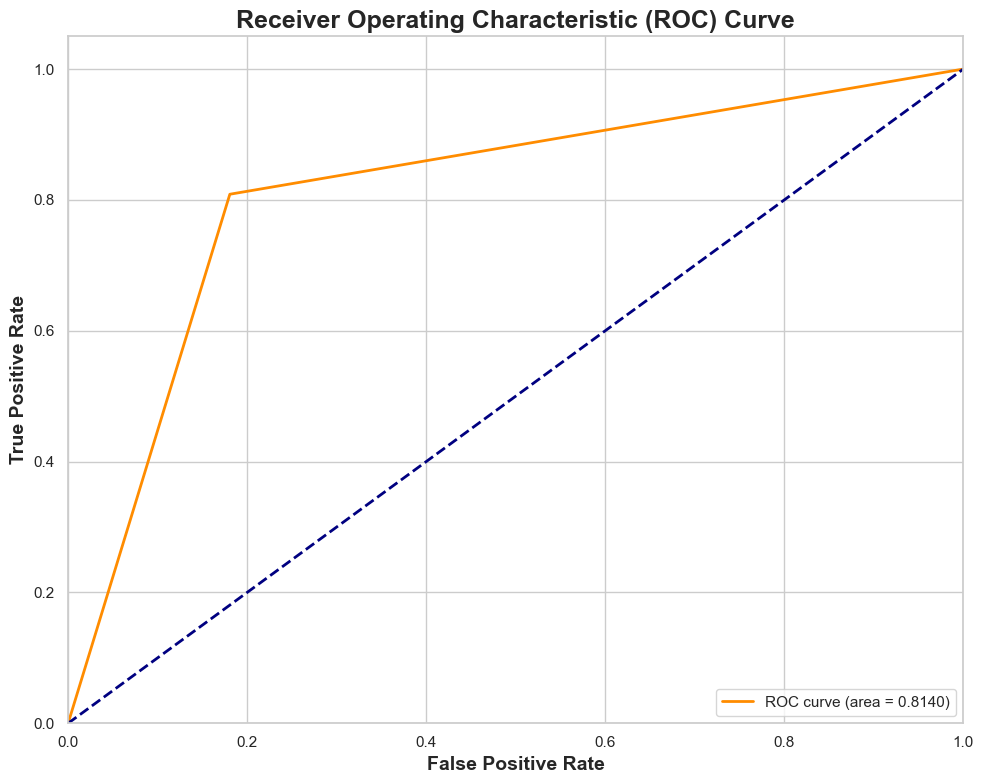

In [96]:
accuracy, recall, precision, f1, roc_auc = evaluate_model_Classification(y_test, y_pred)
models_values.append([accuracy, recall, precision, f1, roc_auc])

## Stacking_model

In [97]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [98]:
xgboost = XGBClassifier(gamma= 0.2, learning_rate= 0.2, max_depth= 3, min_child_weight= 1, n_estimators= 100)
random_forest = RandomForestClassifier(max_depth=10, n_estimators=300, n_jobs=-1)
svc = SVC(C=10)

final_estimator= LogisticRegression()

voting_classifier =[('xgb', xgboost),('rf', random_forest),('svc', svc)]

Stacking_model = StackingClassifier(estimators=voting_classifier, cv=type_cross_valid, final_estimator=LogisticRegression())
Stacking_model.fit(x_train, y_train)

StackingClassifier(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=0.2,
                                              grow_policy=None,...
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('rf',
                                RandomForestClassifier(max_depth=10,
                                                       n_estimators=300,
                                                       n_jobs=-1)),
                               ('svc', SVC(C=10))],
                   final_estimator=LogisticRegression())

In [99]:
plot_feature_importance(Stacking_model, x_train, selected_columns, top_n='first')

Model does not have feature importances or coefficients.


In [100]:
plot_feature_importance(Stacking_model, x_train, selected_columns, top_n='last')

Model does not have feature importances or coefficients.


### Check Overfitting

Accuracy:
Training Accuracy: 0.8615
Validation Accuracy: 0.8394

Precision:
Training Precision: 0.8618
Validation Precision: 0.8393

Recall:
Training Recall: 0.8615
Validation Recall: 0.8394

F1-Score:
Training F1-Score: 0.8616
Validation F1-Score: 0.8394

MCC:
Training MCC: 0.7206
Validation MCC: 0.6768

Balanced Accuracy:
Training Balanced Accuracy: 0.8609
Validation Balanced Accuracy: 0.8383

Confusion Matrix:
Validation Confusion Matrix:
[[315  67]
 [ 66 380]]

Cross-Validation(CV):
Cross-Validation Scores: [0.84183082 0.83188406 0.84753623 0.85449275 0.8284058 ]
Cross-Validation Mean Score: 0.8408


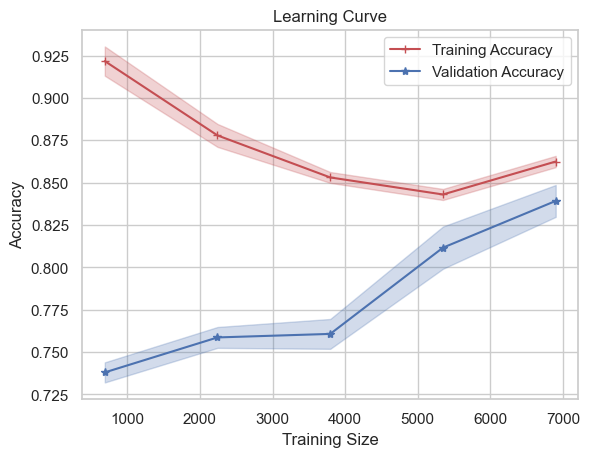

ROC AUC: 0.9186


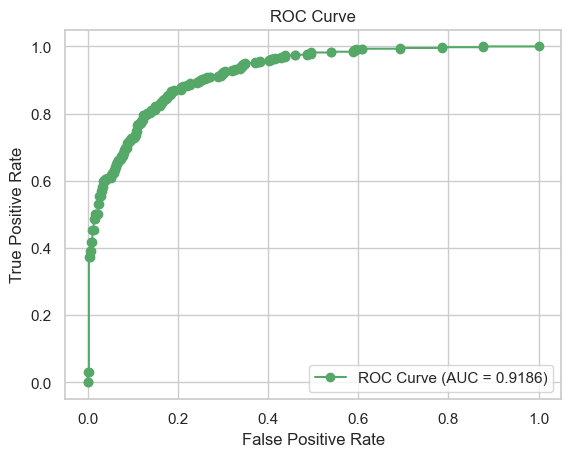

In [101]:
Check_Overfitting_Classification(Stacking_model,x,y,x_train,y_train,x_valid,y_valid)

### Get y_predict

In [102]:
y_pred = Stacking_model.predict(x_test)

### Evaluate model

#### Confusion Matrix

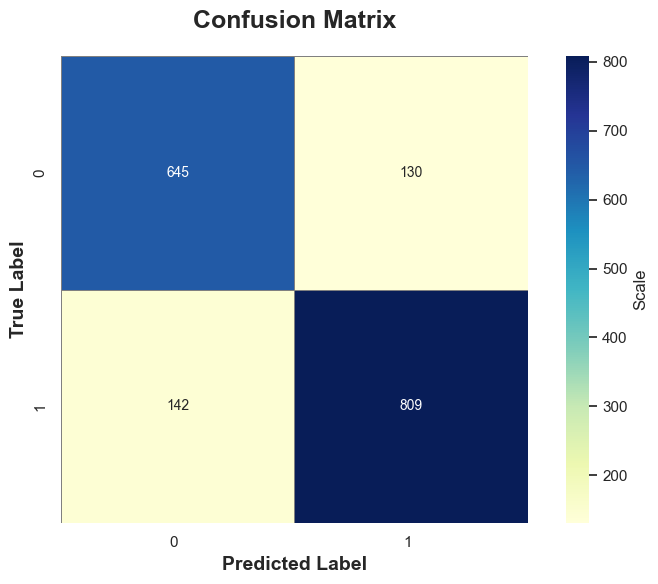

In [103]:
plot_confusion_matrix(y_test, y_pred)

#### accuracy,recall,precision,f1 and roc_auc

Accuracy score = 0.8424
Recall score = 0.8507
Precision score = 0.8616
F1 score = 0.8561
ROC AUC score = 0.8415


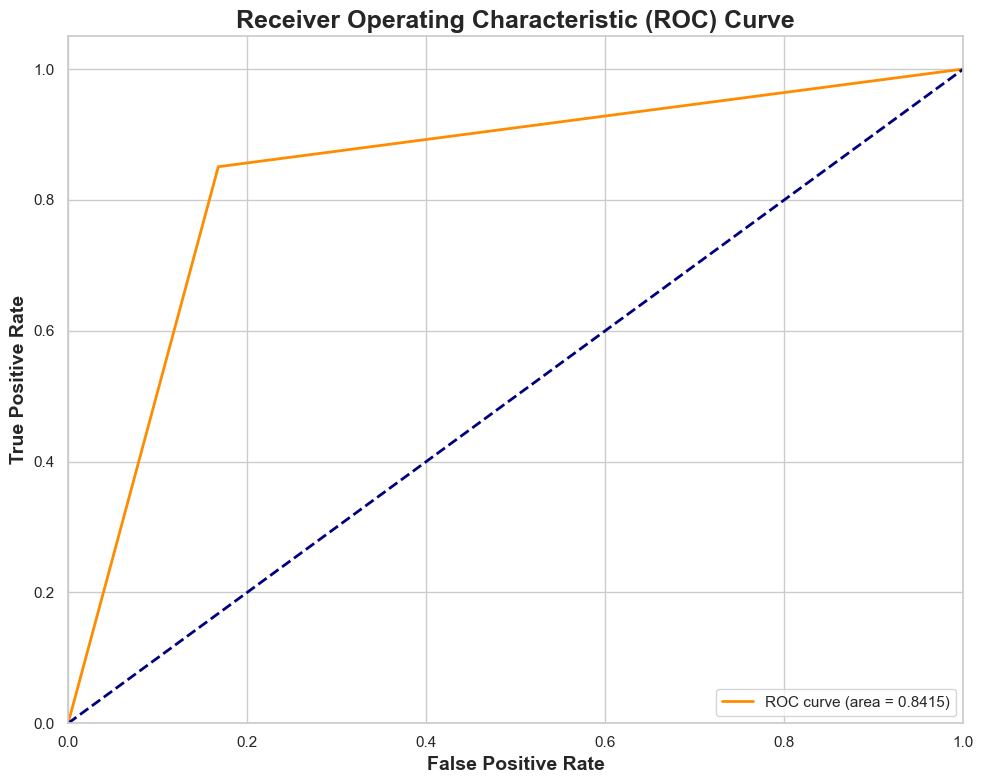

In [104]:
accuracy, recall, precision, f1, roc_auc = evaluate_model_Classification(y_test, y_pred)
models_values.append([accuracy, recall, precision, f1, roc_auc])

# compare between the models

In [105]:
models_names
models_values
evaluate_names = ['accuracy', 'recall', 'precision', 'f1', 'roc_auc']

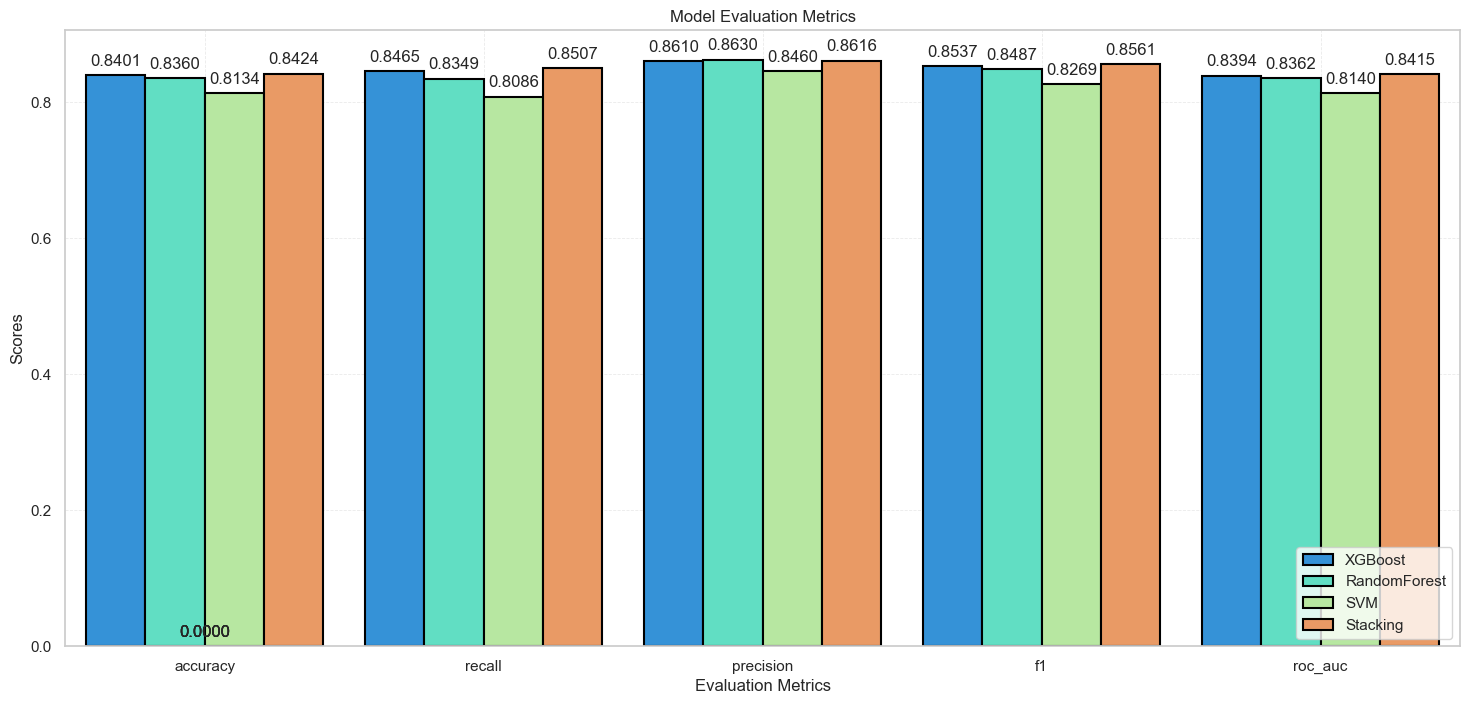

In [106]:
multiple_bar_plots_seaborn(
    data=models_values, 
    labels=models_names, 
    categories=evaluate_names, 
    palette='rainbow',
    title='Model Evaluation Metrics',
    xlabel='Evaluation Metrics',
    ylabel='Scores',
    figsize=(18, 8),
    width=0.85,
    hatch = False,
    annote_num = 4
)